# Final Project pt. 1

* We've been tasked with coming up with a way to accurately predict box office success of a given film based on standard dimensions (i.e. genre, budget, runtime, etc.) 

* Additionally, we've been asked to come up with a way to accureately predict movie genre based on a brief plot description of a film.

First we'll configure our notebook, install the packages we'll be using, and import our dataset:

In [221]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

We'll then create a dataframe using the raw data and explore the first five lines:

We'll also:
* examine the shape of the data
* examine the datatypes
* examine the number of null records by field

After doing so, we can immediately see that deveral fields are formatted in a JSON like format that isn't actually JSON and that the datefield might be tricky to work with given the datatype.

In [222]:
movies = pd.read_csv('tmdb_5000_movies.csv')

In [223]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [224]:
#check the shape
movies.shape

(4803, 20)

In [225]:
#check null values
movies.isnull().sum()
#we see there are, in fact, null values

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [226]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

Next, we'll start to manipulate and visualize the data to get a better sense of what we're working with.

In [227]:
# here we're making a year field
movies['year'] = movies['release_date'].astype(str).str[:4]

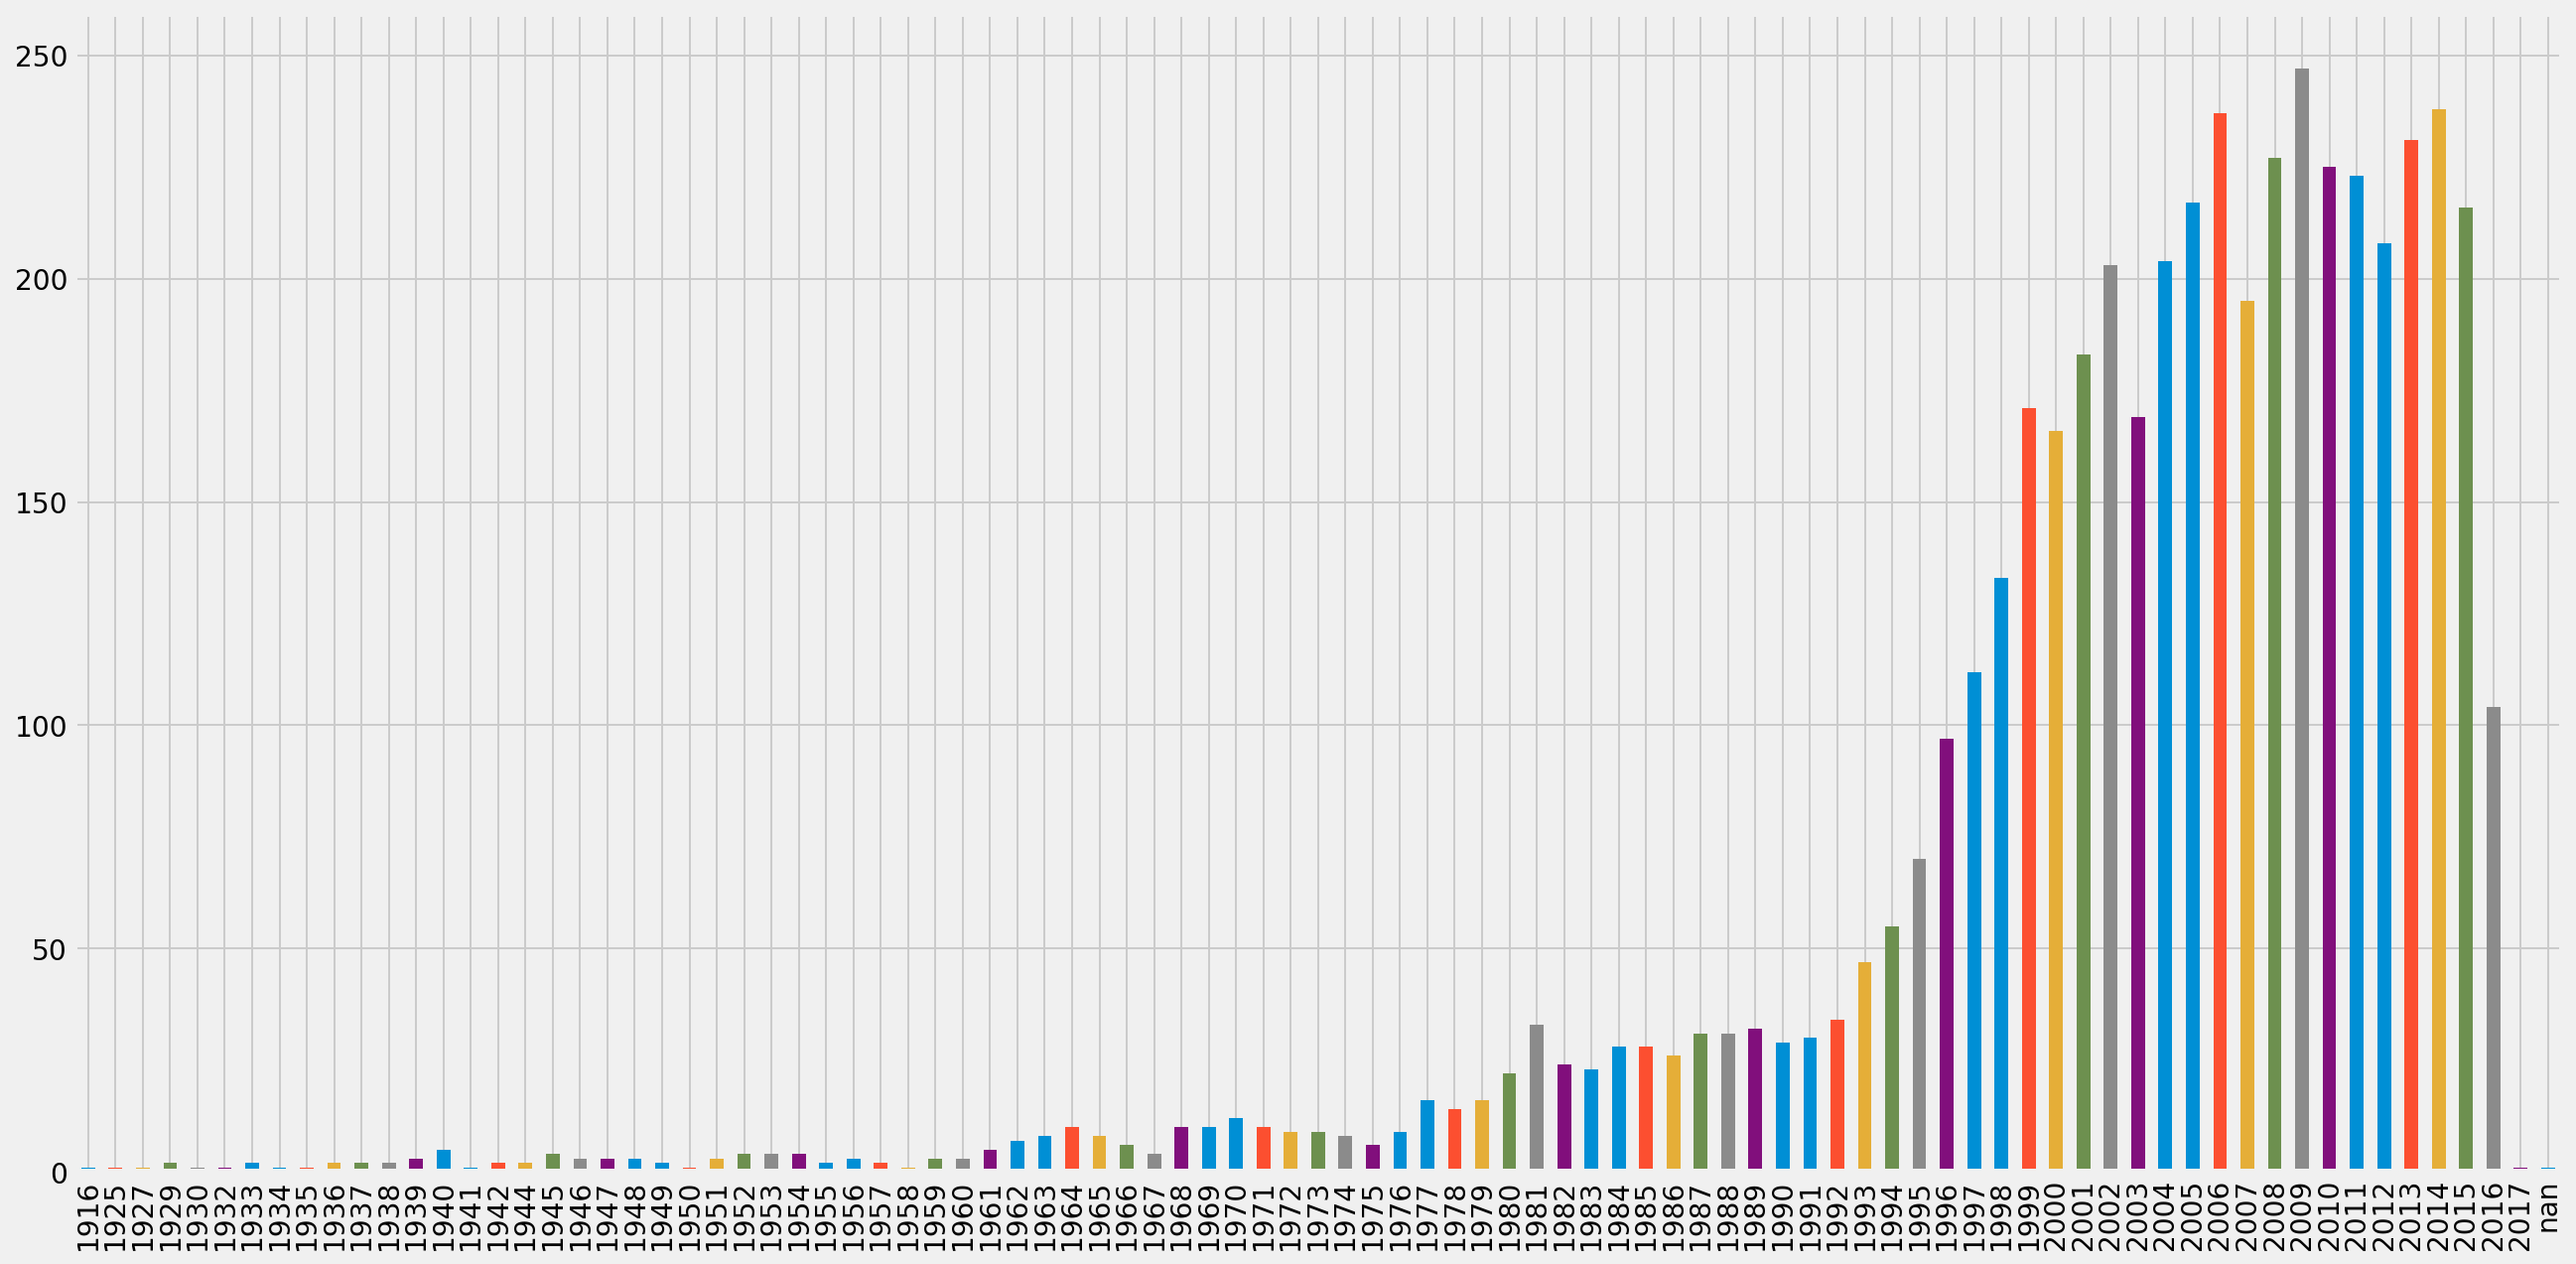

In [228]:
# here we're visualizing the number of movies per year for distribution
ax = movies.year.value_counts().sort_index().plot(kind='bar', figsize=(20,10))

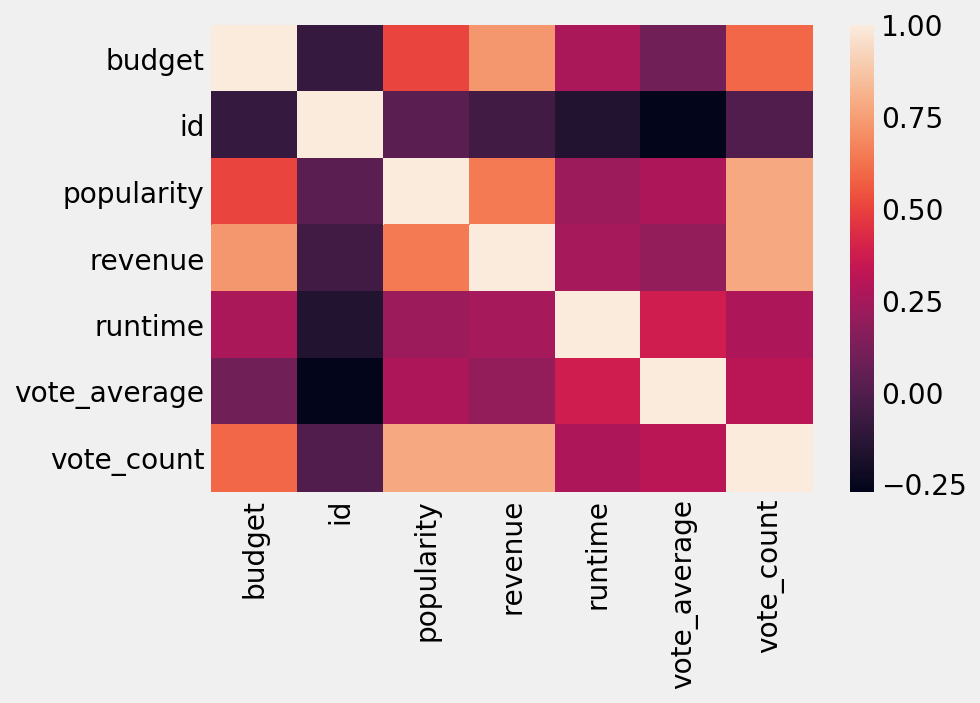

In [229]:
#then we'll check for basic correlations. it really is too early though as we still need to clean the data.
movies_correlations = movies.corr();
sns.heatmap(movies_correlations);

In the next section we'll begin to clean up the genre field in order to format it the way we ultimately want it.
In order to preserve the integrity of the original dataframe, I've chosen to create a new test dataframe to work with:

In [230]:
#cleaning up the genre field
new_test_df = df = pd.DataFrame(movies.genres) 

In [231]:
new_test_df.head(5)

,genres
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


In [232]:
new_test_df_three = pd.DataFrame(movies['genres'].values.tolist(), index = movies.index)

In [233]:
new_test_df_three.head(5)

,0
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


In [234]:
new_test_df_three['Drama'] = new_test_df_three[0].str.contains("Drama")
new_test_df_three['Comedy'] = new_test_df_three[0].str.contains("Comedy")
new_test_df_three['Action'] = new_test_df_three[0].str.contains("Action")
new_test_df_three['Adventure'] = new_test_df_three[0].str.contains("Adventure")
new_test_df_three['Horror'] = new_test_df_three[0].str.contains("Horror")
new_test_df_three['Crime'] = new_test_df_three[0].str.contains("Crime")
new_test_df_three['Thriller'] = new_test_df_three[0].str.contains("Thriller")
new_test_df_three['Animation'] = new_test_df_three[0].str.contains("Animation")
new_test_df_three['Fantasy'] = new_test_df_three[0].str.contains("Fantasy")
new_test_df_three['Romance'] = new_test_df_three[0].str.contains("Romance")
new_test_df_three['Science Fiction'] = new_test_df_three[0].str.contains("Science Fiction")
new_test_df_three['Documentary'] = new_test_df_three[0].str.contains("Documentary")
new_test_df_three['Family'] = new_test_df_three[0].str.contains("Family")
new_test_df_three['Mystery'] = new_test_df_three[0].str.contains("Mystery")
new_test_df_three['Music'] = new_test_df_three[0].str.contains("Music")
new_test_df_three['Western'] = new_test_df_three[0].str.contains("Western")
new_test_df_three['History'] = new_test_df_three[0].str.contains("History")
new_test_df_three['War'] = new_test_df_three[0].str.contains("War")
new_test_df_three['TV Movie'] = new_test_df_three[0].str.contains("TV Movie")
new_test_df_three['Foreign'] = new_test_df_three[0].str.contains("Foreign")
new_test_df_three.head(5)

,0,Drama,Comedy,Action,Adventure,Horror,Crime,Thriller,Animation,Fantasy,...,Science Fiction,Documentary,Family,Mystery,Music,Western,History,War,TV Movie,Foreign
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",False,False,True,True,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",False,False,True,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",False,False,True,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",True,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",False,False,True,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [235]:
new_test_df_five = new_test_df_three.drop([new_test_df_three.columns[0]],axis='columns')
new_test_df_five.sample(5)

,Drama,Comedy,Action,Adventure,Horror,Crime,Thriller,Animation,Fantasy,Romance,Science Fiction,Documentary,Family,Mystery,Music,Western,History,War,TV Movie,Foreign
506,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
4530,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2333,True,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
2508,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4313,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


Now that we have the genre fields split out the way we want, we'll concatinate this new data frame back to the original and create a new one:

In [236]:
movies_final = pd.concat([movies, new_test_df_five], axis=1)
movies_final.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,Science Fiction,Documentary,Family,Mystery,Music,Western,History,War,TV Movie,Foreign
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,True,False,False,False,False,False,False,False,False,False
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,False,False,False,False,False,False,False,False,False,False
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,False,False,False,False,False,False,False,False,False,False
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,False,False,False,False,False,False,False,False,False,False
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,True,False,False,False,False,False,False,False,False,False


In [237]:
movies_final = movies_final.drop(columns=['original_language','original_title'])
movies_final.head(5)

,budget,genres,homepage,id,keywords,overview,popularity,production_companies,production_countries,release_date,...,Science Fiction,Documentary,Family,Mystery,Music,Western,History,War,TV Movie,Foreign
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,...,True,False,False,False,False,False,False,False,False,False
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,...,False,False,False,False,False,False,False,False,False,False
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,...,False,False,False,False,False,False,False,False,False,False
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,...,False,False,False,False,False,False,False,False,False,False
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,...,True,False,False,False,False,False,False,False,False,False


Then we'll begin to drop columns that are of little interest to us / little relevancy to the model:

In [238]:
movies_final = movies_final.drop(columns=['popularity','production_countries'])
movies_final.head(5)

,budget,genres,homepage,id,keywords,overview,production_companies,release_date,revenue,runtime,...,Science Fiction,Documentary,Family,Mystery,Music,Western,History,War,TV Movie,Foreign
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,...,True,False,False,False,False,False,False,False,False,False
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,...,False,False,False,False,False,False,False,False,False,False
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,...,False,False,False,False,False,False,False,False,False,False
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,...,False,False,False,False,False,False,False,False,False,False
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,...,True,False,False,False,False,False,False,False,False,False


In [239]:
movies_final.status.value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [240]:
movies_final = movies_final[movies_final.status == 'Released']
movies_final.status.value_counts()

Released    4795
Name: status, dtype: int64

In [241]:
movies_final = movies_final.drop(columns=['status'])
movies_final.head(5)

,budget,genres,homepage,id,keywords,overview,production_companies,release_date,revenue,runtime,...,Science Fiction,Documentary,Family,Mystery,Music,Western,History,War,TV Movie,Foreign
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,...,True,False,False,False,False,False,False,False,False,False
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,...,False,False,False,False,False,False,False,False,False,False
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,...,False,False,False,False,False,False,False,False,False,False
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,...,False,False,False,False,False,False,False,False,False,False
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,...,True,False,False,False,False,False,False,False,False,False


In [242]:
movies_final.shape

(4795, 36)

It looks like we have a solid set of fields at this point, but there are still several with null values in them so we'll remove those as well:

In [243]:
movies_final.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'overview',
       'production_companies', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'tagline', 'title', 'vote_average', 'vote_count',
       'year', 'Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime',
       'Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction',
       'Documentary', 'Family', 'Mystery', 'Music', 'Western', 'History',
       'War', 'TV Movie', 'Foreign'],
      dtype='object')

In [244]:
pd.isnull(movies_final).sum()

budget                     0
genres                     0
homepage                3086
id                         0
keywords                   0
overview                   3
production_companies       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
tagline                  838
title                      0
vote_average               0
vote_count                 0
year                       0
Drama                      0
Comedy                     0
Action                     0
Adventure                  0
Horror                     0
Crime                      0
Thriller                   0
Animation                  0
Fantasy                    0
Romance                    0
Science Fiction            0
Documentary                0
Family                     0
Mystery                    0
Music                      0
Western                    0
History                    0
War                        0
TV Movie      

In [245]:
movies_final_two = movies_final.drop(columns=['homepage','runtime','release_date','overview','homepage','tagline'])
pd.isnull(movies_final_two).sum()

budget                  0
genres                  0
id                      0
keywords                0
production_companies    0
revenue                 0
spoken_languages        0
title                   0
vote_average            0
vote_count              0
year                    0
Drama                   0
Comedy                  0
Action                  0
Adventure               0
Horror                  0
Crime                   0
Thriller                0
Animation               0
Fantasy                 0
Romance                 0
Science Fiction         0
Documentary             0
Family                  0
Mystery                 0
Music                   0
Western                 0
History                 0
War                     0
TV Movie                0
Foreign                 0
dtype: int64

In [246]:
genre_list = ('Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime', 'Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'Family', 'Mystery', 'Music', 'Western', 'History', 'War', 'TV Movie', 'Foreign')
print(genre_list)

('Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime', 'Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'Family', 'Mystery', 'Music', 'Western', 'History', 'War', 'TV Movie', 'Foreign')


In [247]:
movies_final_two[['Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime', 'Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'Family', 'Mystery', 'Music', 'Western', 'History', 'War', 'TV Movie', 'Foreign']] = movies_final_two[['Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime', 'Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'Family', 'Mystery', 'Music', 'Western', 'History', 'War', 'TV Movie', 'Foreign']].astype(int)
movies_final_two.head(5)

movies_final[['Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime', 'Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'Family', 'Mystery', 'Music', 'Western', 'History', 'War', 'TV Movie', 'Foreign']] = movies_final[['Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime', 'Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction', 'Documentary', 'Family', 'Mystery', 'Music', 'Western', 'History', 'War', 'TV Movie', 'Foreign']].astype(int)
movies_final.head(5)

,budget,genres,homepage,id,keywords,overview,production_companies,release_date,revenue,runtime,...,Science Fiction,Documentary,Family,Mystery,Music,Western,History,War,TV Movie,Foreign
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,...,1,0,0,0,0,0,0,0,0,0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,...,0,0,0,0,0,0,0,0,0,0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,...,0,0,0,0,0,0,0,0,0,0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,...,0,0,0,0,0,0,0,0,0,0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,...,1,0,0,0,0,0,0,0,0,0


Now that we have the data roughly the way we want it, we'll begin to visualize the relationships between various fields and revenue:

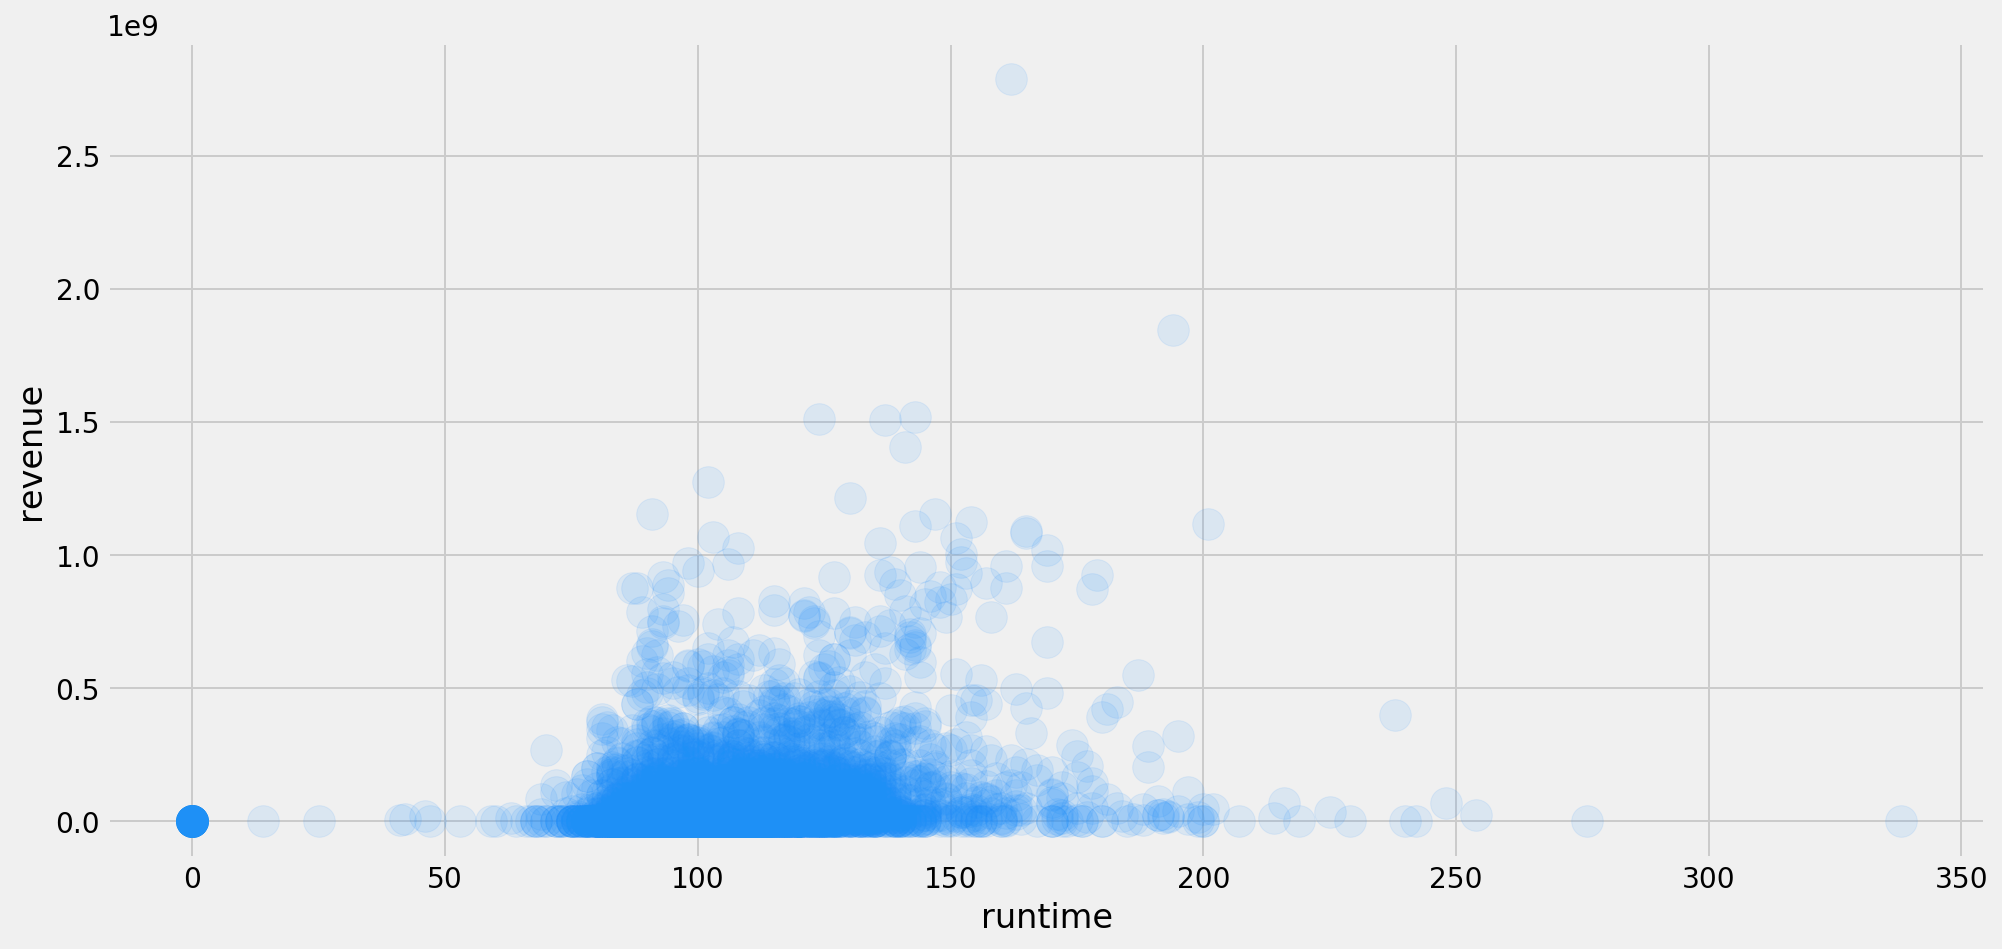

In [248]:
movies_final.plot(x = 'runtime', y='revenue', kind='scatter', color='dodgerblue', figsize=(15,7), s=250, alpha = .1);

In [249]:
movies_final_four = movies_final[pd.notna(movies_final['homepage'])]

In [250]:
movies_final_four.head(5)

,budget,genres,homepage,id,keywords,overview,production_companies,release_date,revenue,runtime,...,Science Fiction,Documentary,Family,Mystery,Music,Western,History,War,TV Movie,Foreign
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,...,1,0,0,0,0,0,0,0,0,0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,...,0,0,0,0,0,0,0,0,0,0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,...,0,0,0,0,0,0,0,0,0,0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,...,0,0,0,0,0,0,0,0,0,0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,...,1,0,0,0,0,0,0,0,0,0


In [251]:
movies_final_four = movies_final[pd.notna(movies_final['homepage'])]

In [252]:
movies_final_four["year_int"] = movies_final_four.year.astype(int)
movies_final_four.dtypes

/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
overview                 object
production_companies     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
year                     object
Drama                     int64
Comedy                    int64
Action                    int64
Adventure                 int64
Horror                    int64
Crime                     int64
Thriller                  int64
Animation                 int64
Fantasy                   int64
Romance                   int64
Science Fiction           int64
Documentary               int64
Family                    int64
Mystery                   int64
Music                     int64
Western 

At this point, we've decided to limit the dataset to films released in 1990 or later as trends tend to change in film and we want to make sure we're looking at relevant data. Additionally, the data is generally sekwed towards more recent films anyway.

In [253]:
movies_1990 = movies_final_four[movies_final_four['year_int'] >= 1990]

In [254]:
movies_1990.sample(5)

,budget,genres,homepage,id,keywords,overview,production_companies,release_date,revenue,runtime,...,Documentary,Family,Mystery,Music,Western,History,War,TV Movie,Foreign,year_int
2928,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",http://www.saw6film.com/,22804,"[{""id"": 179430, ""name"": ""aftercreditsstinger""}]","Special Agent Strahm is dead, and Detective Ho...","[{""name"": ""Lionsgate"", ""id"": 1632}, {""name"": ""...",2009-10-22,68233629,90.0,...,0,0,1,0,0,0,0,0,0,2009
2714,14000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxsearchlight.com/margaret/,44754,"[{""id"": 242, ""name"": ""new york""}, {""id"": 992, ...","A young woman witnesses a bus accident, and is...","[{""name"": ""Fox Searchlight Pictures"", ""id"": 43...",2011-09-30,46495,149.0,...,0,0,0,0,0,0,0,0,0,2011
3604,5000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",http://apollo18movie.net/,50357,"[{""id"": 305, ""name"": ""moon""}, {""id"": 1432, ""na...","Officially, Apollo 17 was the last manned miss...","[{""name"": ""Bazelevs Production"", ""id"": 1038}, ...",2011-07-20,25562924,86.0,...,0,0,0,0,0,0,0,0,0,2011
127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.madmaxmovie.com/,76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",An apocalyptic story set in the furthest reach...,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",2015-05-13,378858340,120.0,...,0,0,0,0,0,0,0,0,0,2015
4765,0,"[{""id"": 27, ""name"": ""Horror""}]",https://www.facebook.com/pages/Raymond-Did-It/...,228550,"[{""id"": 6270, ""name"": ""high school""}, {""id"": 9...",Mentally challenged Raymond Rourke gets blamed...,[],2011-03-27,0,83.0,...,0,0,0,0,0,0,0,0,0,2011


However, it just occured to us that we'll also need to account for inflation! A dollar in 1990 is worth far more than a dollar today. So in order to account for this issue, we'll import a new dataset and create a series of modified fields that use the inflation rates as multipliers:

In [255]:
inflation = pd.read_csv('inflation_data.csv')
inflation.head(5)

,year,buying_power
0,1990,1.000000
1,1991,0.959618
2,1992,0.931575
3,1993,0.904498
4,1994,0.881916


In [256]:
movies_1990_two = pd.merge(movies_1990, inflation, left_on = 'year_int', right_on = 'year')
movies_1990_two.head(5)

,budget,genres,homepage,id,keywords,overview,production_companies,release_date,revenue,runtime,...,Mystery,Music,Western,History,War,TV Movie,Foreign,year_int,year_y,buying_power
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,...,0,0,0,0,0,0,0,2009,2009,0.609219
1,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://harrypotter.warnerbros.com/harrypottera...,767,"[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...","As Harry begins his sixth year at Hogwarts, he...","[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...",2009-07-07,933959197,153.0,...,0,0,0,0,0,0,0,2009,2009,0.609219
2,150000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://www.transformersmovie.com/,8373,"[{""id"": 1160, ""name"": ""egypt""}, {""id"": 1670, ""...",Sam Witwicky leaves the Autobots behind for a ...,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",2009-06-19,836297228,150.0,...,0,0,0,0,0,0,0,2009,2009,0.609219
3,200000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",https://www.warnerbros.com/terminator-salvation,534,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...","All grown up in post-apocalyptic 2018, John Co...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2009-05-20,371353001,115.0,...,0,0,0,0,0,0,0,2009,2009,0.609219
4,200000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/2012,14161,"[{""id"": 2163, ""name"": ""civilization""}, {""id"": ...","Dr. Adrian Helmsley, part of a worldwide geoph...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2009-10-10,769653595,158.0,...,0,0,0,0,0,0,0,2009,2009,0.609219


In [257]:
#we need to adjust for inflation

movies_1990_two["revenue_adj"] = (movies_1990_two.revenue * movies_1990_two.buying_power)
movies_1990_two["budget_adj"] = (movies_1990_two.budget * movies_1990_two.buying_power)
movies_1990_two.head(5)

,budget,genres,homepage,id,keywords,overview,production_companies,release_date,revenue,runtime,...,Western,History,War,TV Movie,Foreign,year_int,year_y,buying_power,revenue_adj,budget_adj
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,...,0,0,0,0,0,2009,2009,0.609219,1.698481e+09,1.443849e+08
1,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://harrypotter.warnerbros.com/harrypottera...,767,"[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...","As Harry begins his sixth year at Hogwarts, he...","[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...",2009-07-07,933959197,153.0,...,0,0,0,0,0,2009,2009,0.609219,5.689856e+08,1.523047e+08
2,150000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://www.transformersmovie.com/,8373,"[{""id"": 1160, ""name"": ""egypt""}, {""id"": 1670, ""...",Sam Witwicky leaves the Autobots behind for a ...,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",2009-06-19,836297228,150.0,...,0,0,0,0,0,2009,2009,0.609219,5.094881e+08,9.138284e+07
3,200000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",https://www.warnerbros.com/terminator-salvation,534,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...","All grown up in post-apocalyptic 2018, John Co...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2009-05-20,371353001,115.0,...,0,0,0,0,0,2009,2009,0.609219,2.262353e+08,1.218438e+08
4,200000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/2012,14161,"[{""id"": 2163, ""name"": ""civilization""}, {""id"": ...","Dr. Adrian Helmsley, part of a worldwide geoph...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2009-10-10,769653595,158.0,...,0,0,0,0,0,2009,2009,0.609219,4.688875e+08,1.218438e+08


Now are data is 99% of the way there! We can start to visualize various relationships between fields and the modified revenues:

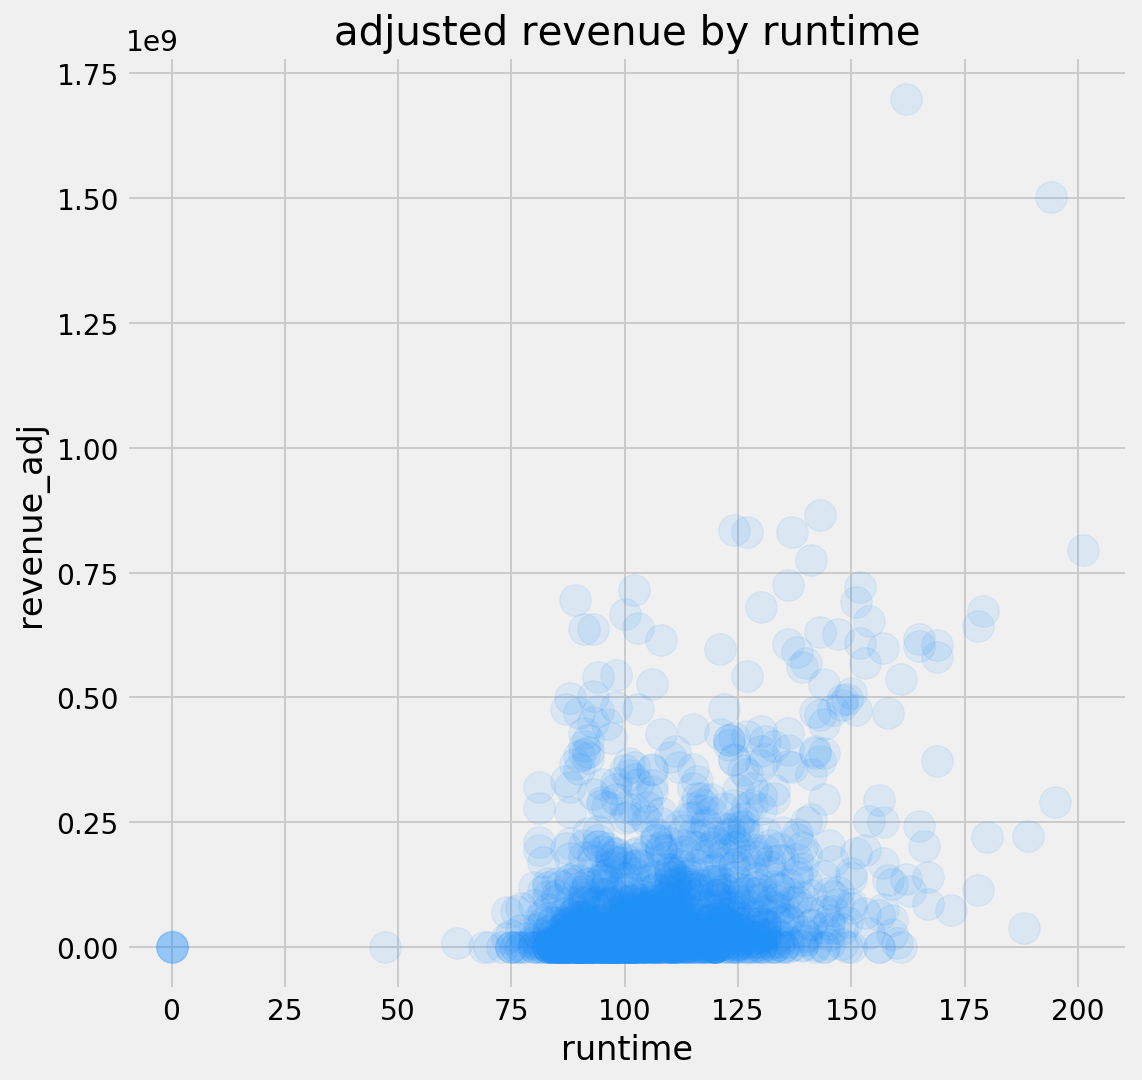

In [258]:
movies_1990_two.plot(x = 'runtime', y='revenue_adj', kind='scatter', color='dodgerblue', figsize=(8,8), s=250, alpha = .1, title = "adjusted revenue by runtime");

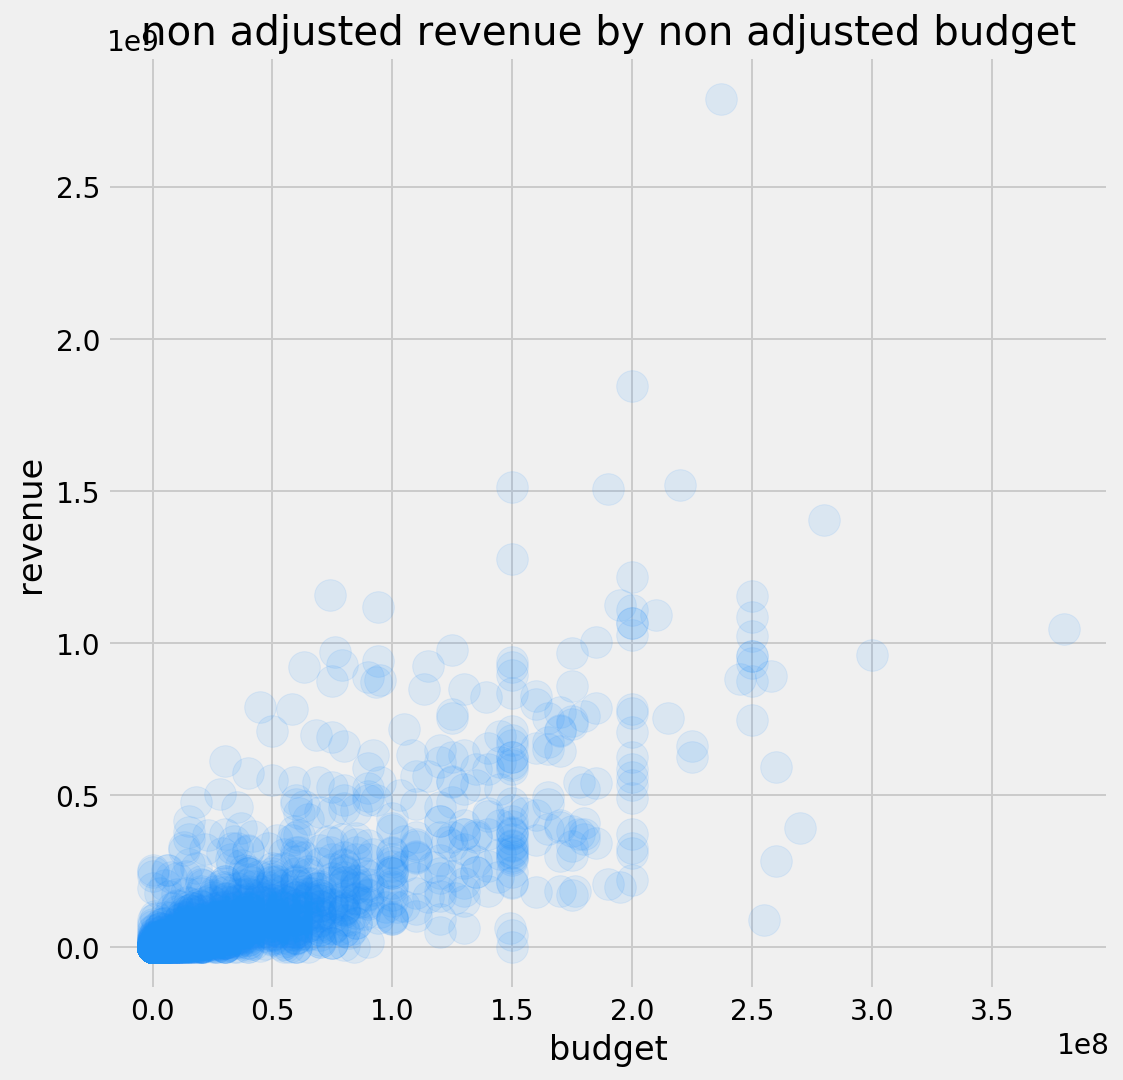

In [259]:
movies_1990_two.plot(x = 'budget', y='revenue', kind='scatter', color='dodgerblue', figsize=(8,8), s=250, alpha = .1, title = "non adjusted revenue by non adjusted budget");

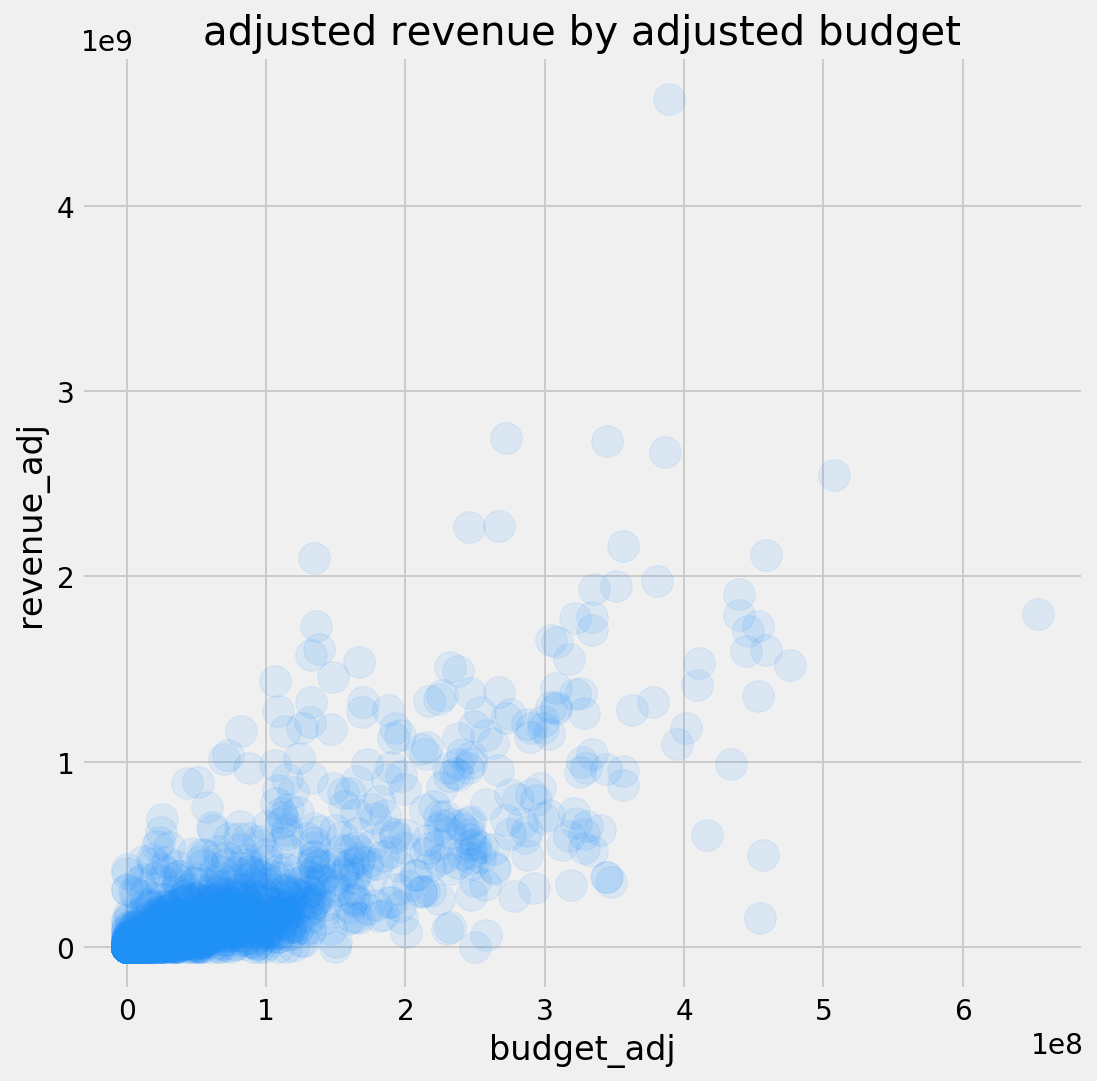

In [204]:
movies_1990_two.plot(x = 'budget_adj', y='revenue_adj', kind='scatter', color='dodgerblue', figsize=(8,8), s=250, alpha = .1, title = "adjusted revenue by adjusted budget");

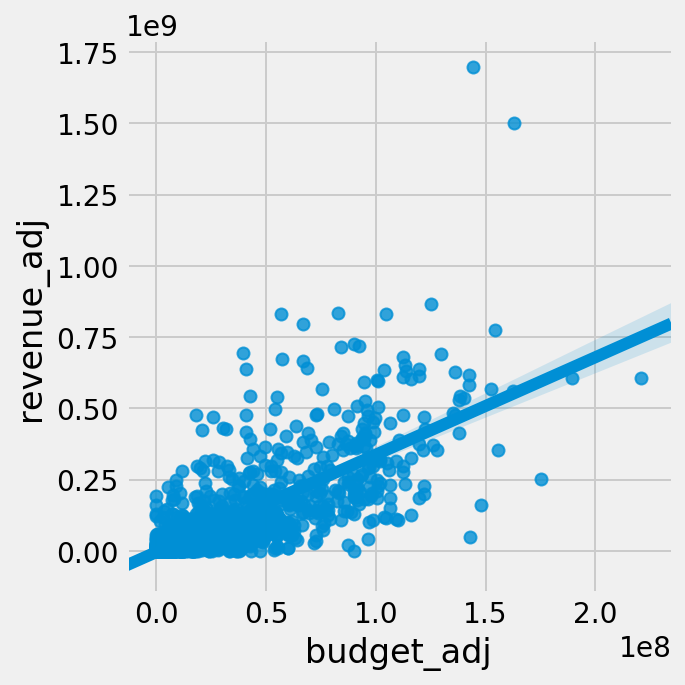

In [260]:
sns.lmplot(x = 'budget_adj', y='revenue_adj',data=movies_1990_two,fit_reg=True) 

In [261]:
genre_list = ('Drama','Comedy','Action','Adventure','Horror','Crime','Thriller','Animation','Fantasy','Romance','Science Fiction','Documentary','Family','Mystery','Music','Western','History','War','TV Movie','Foreign')

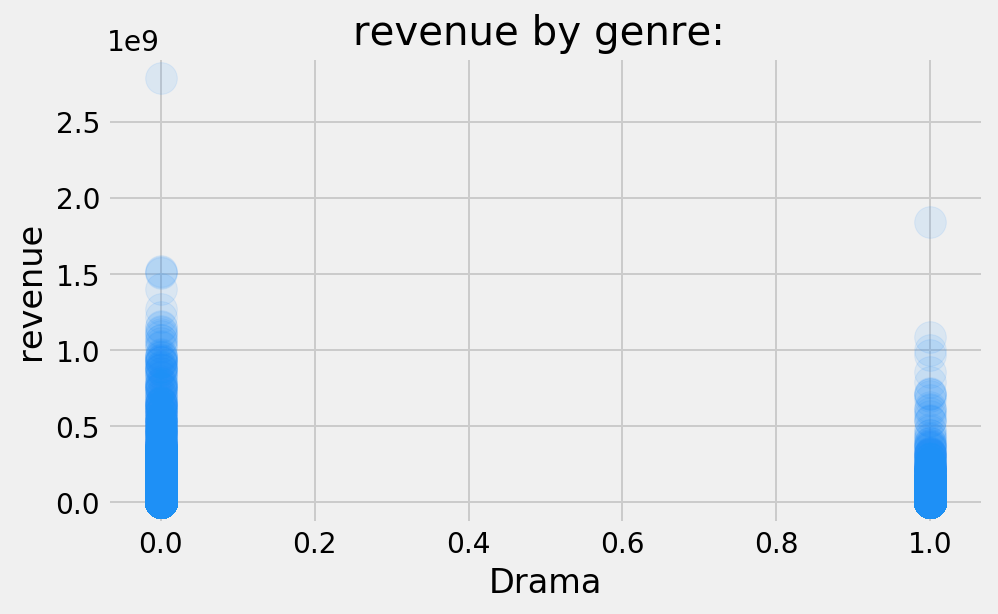

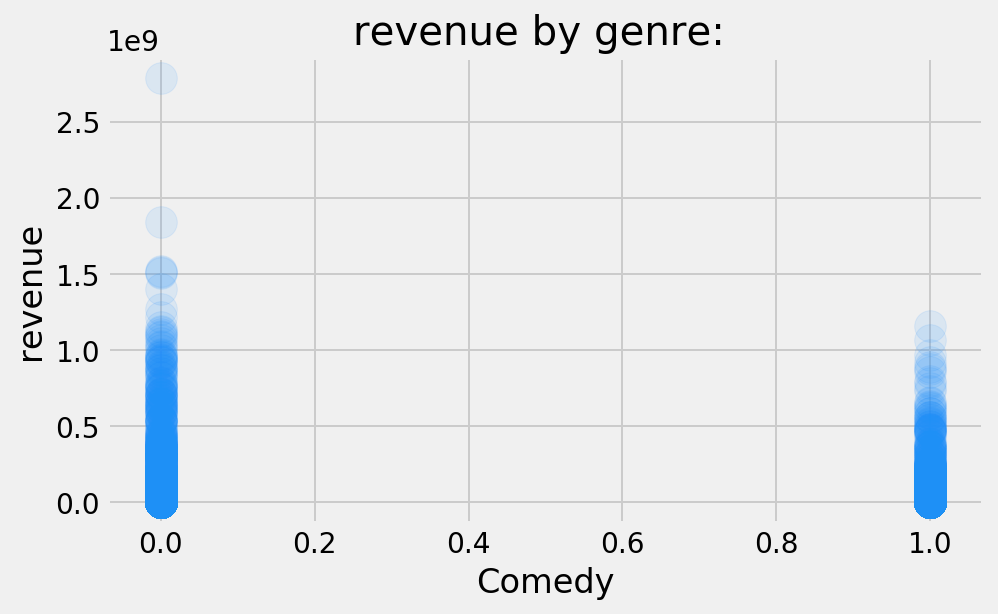

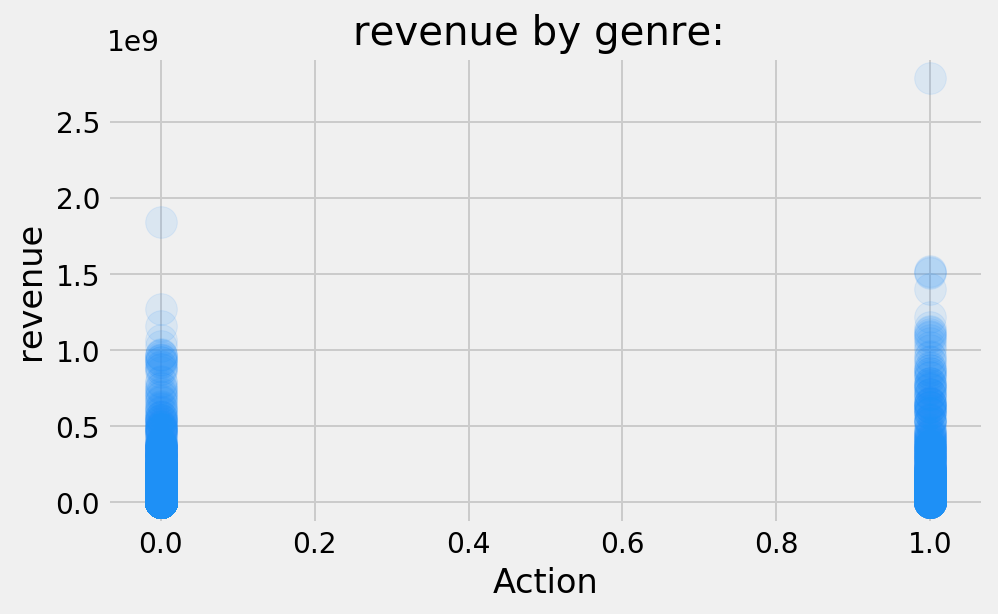

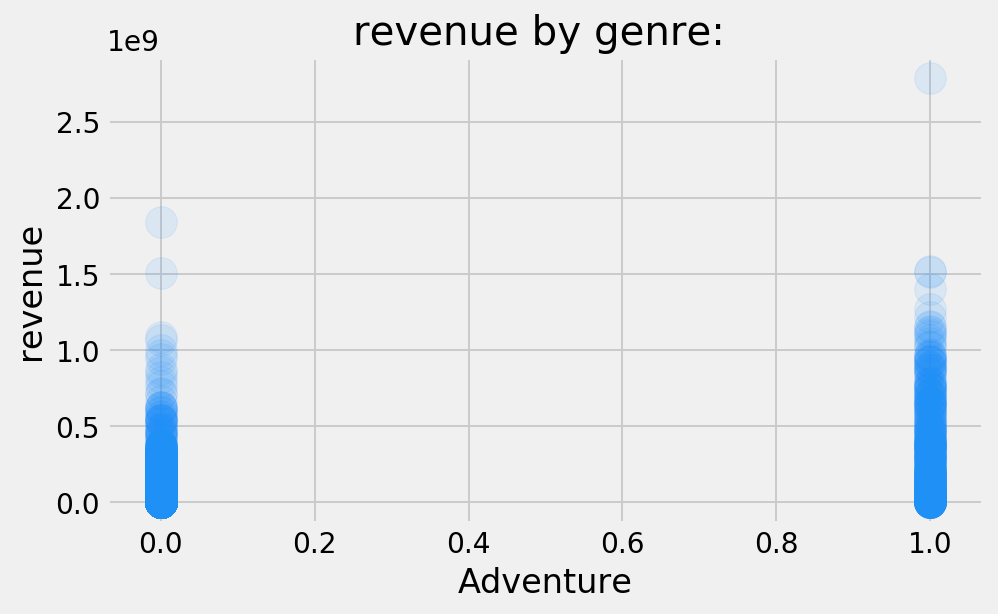

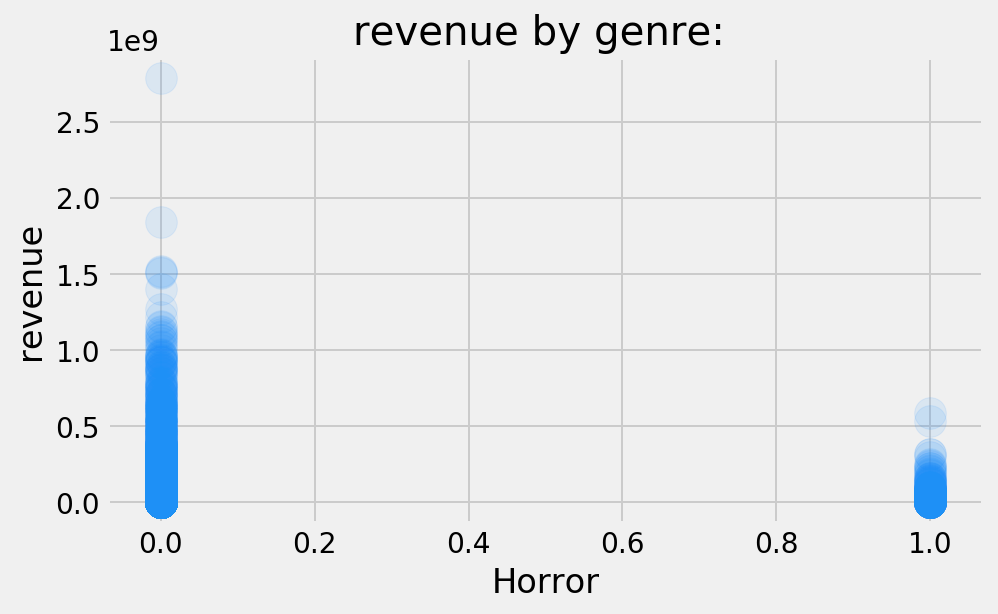

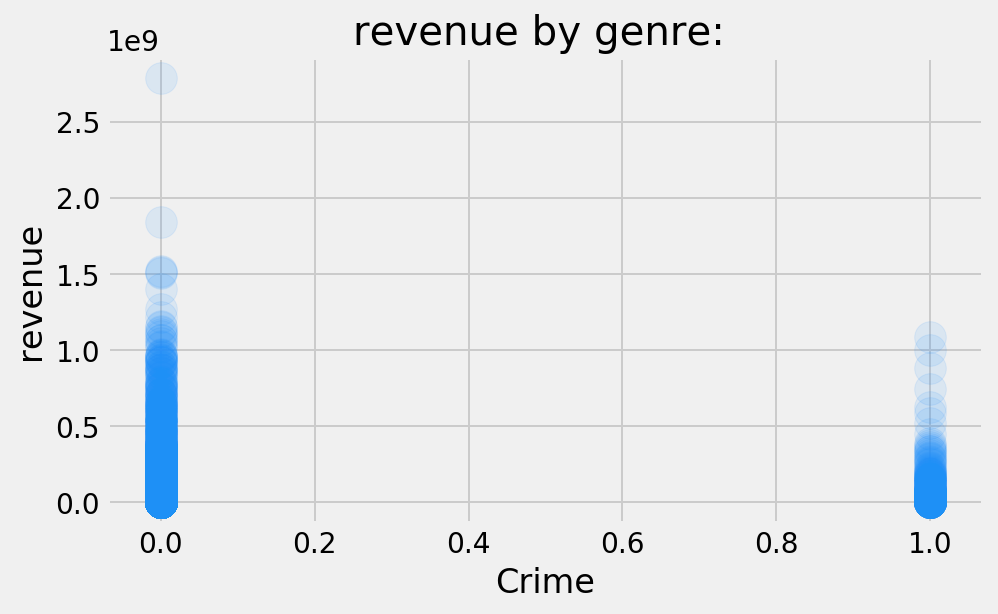

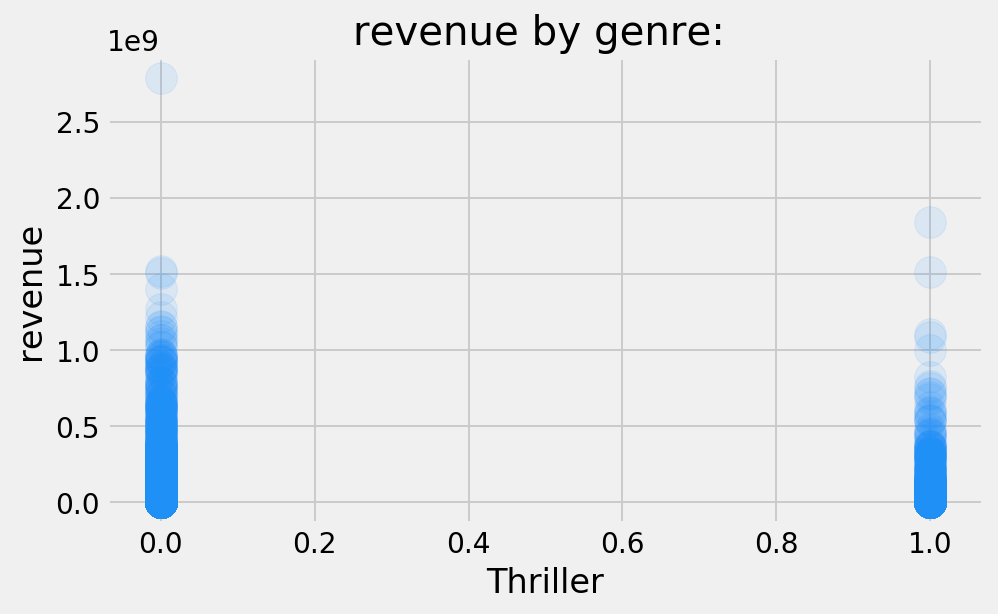

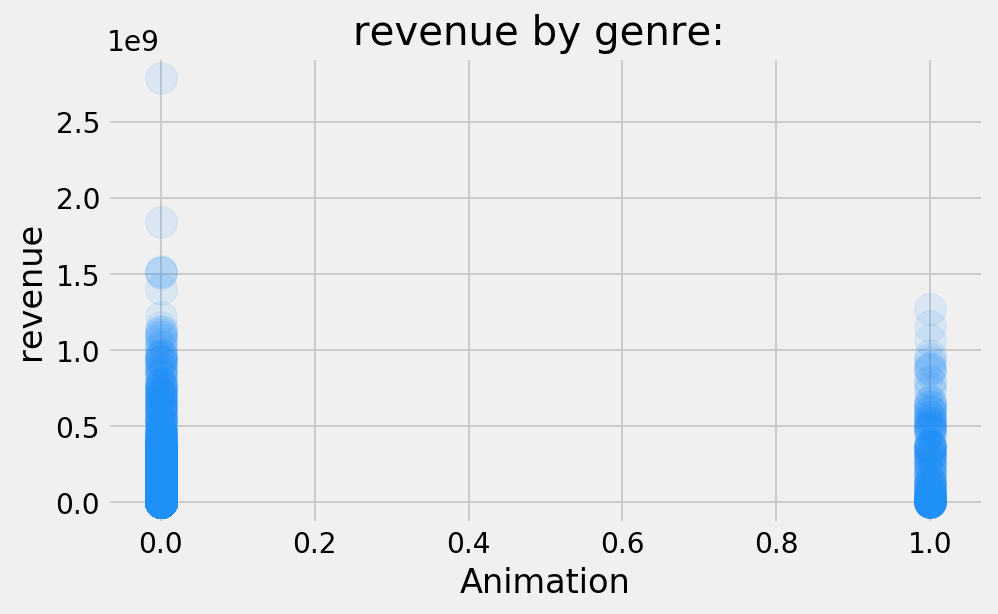

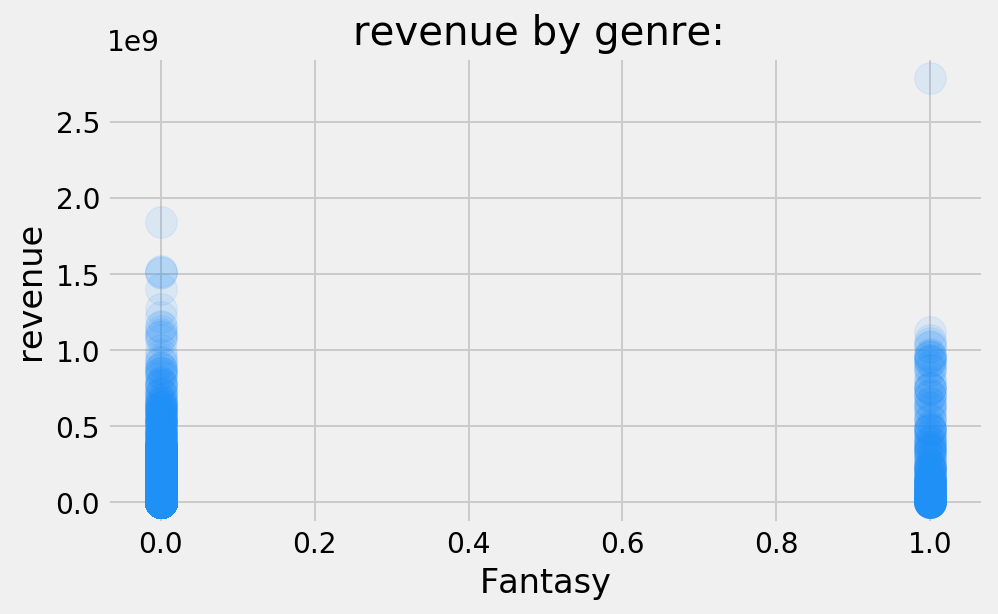

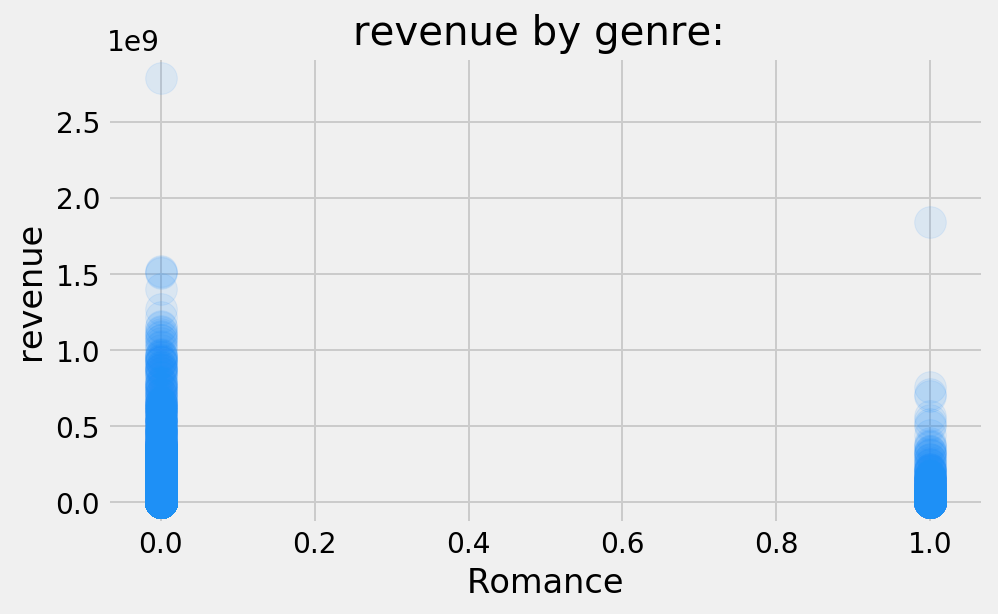

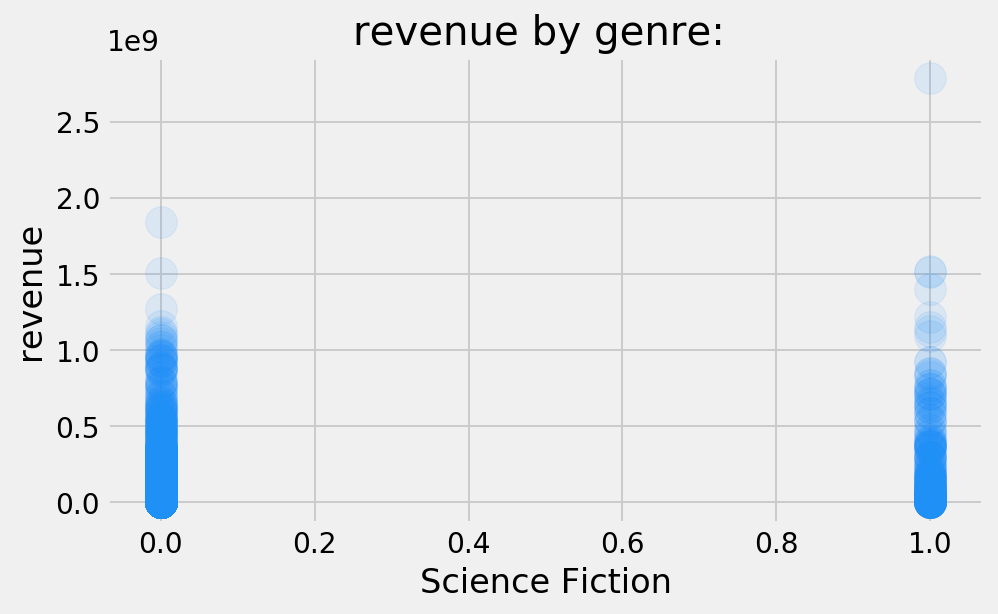

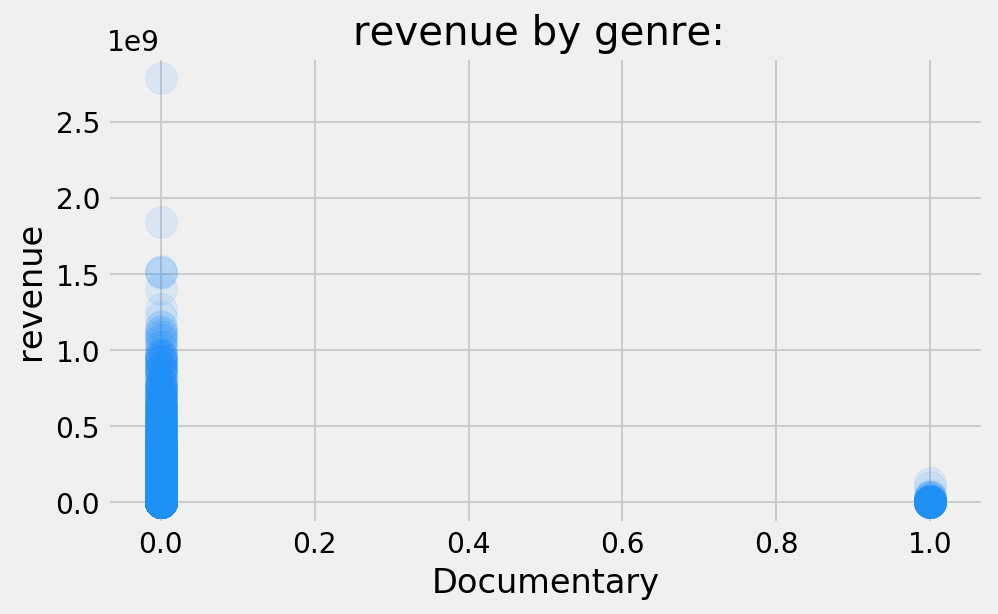

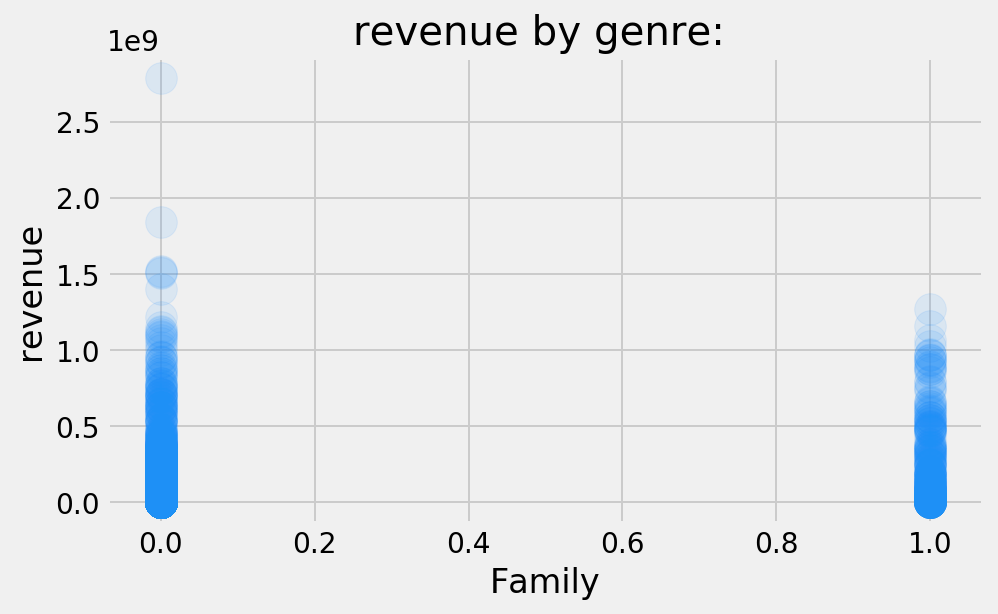

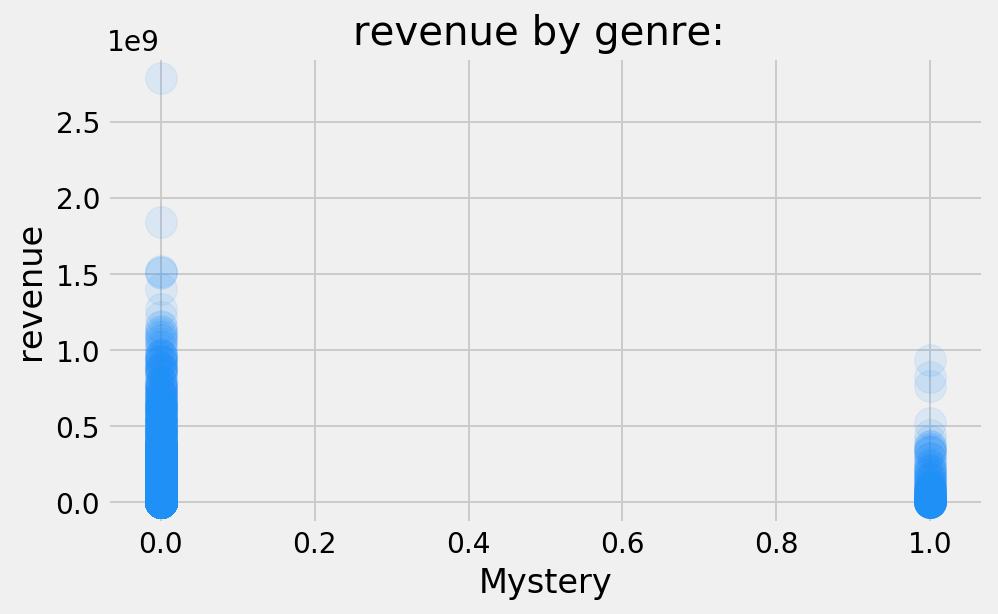

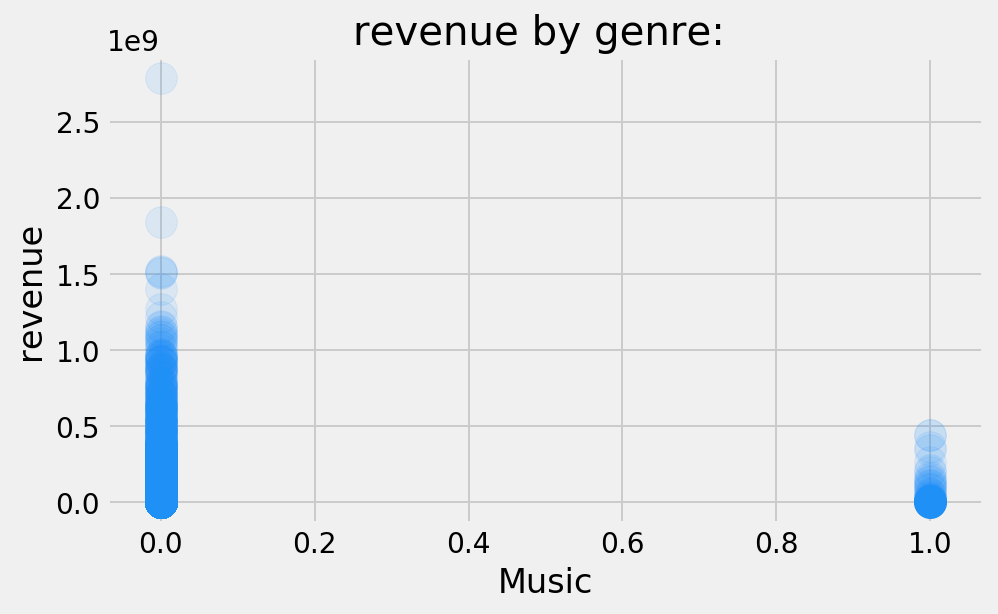

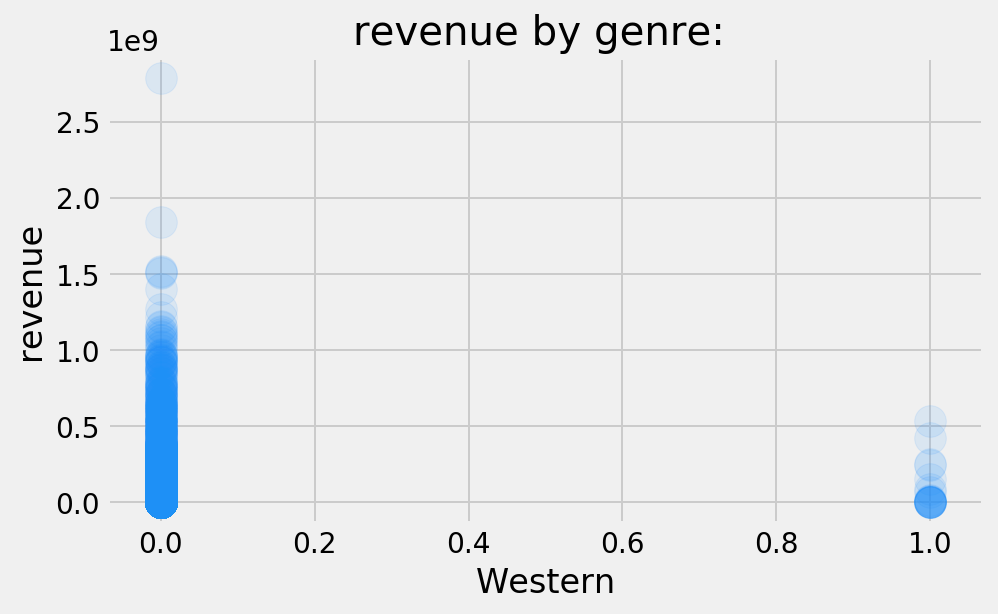

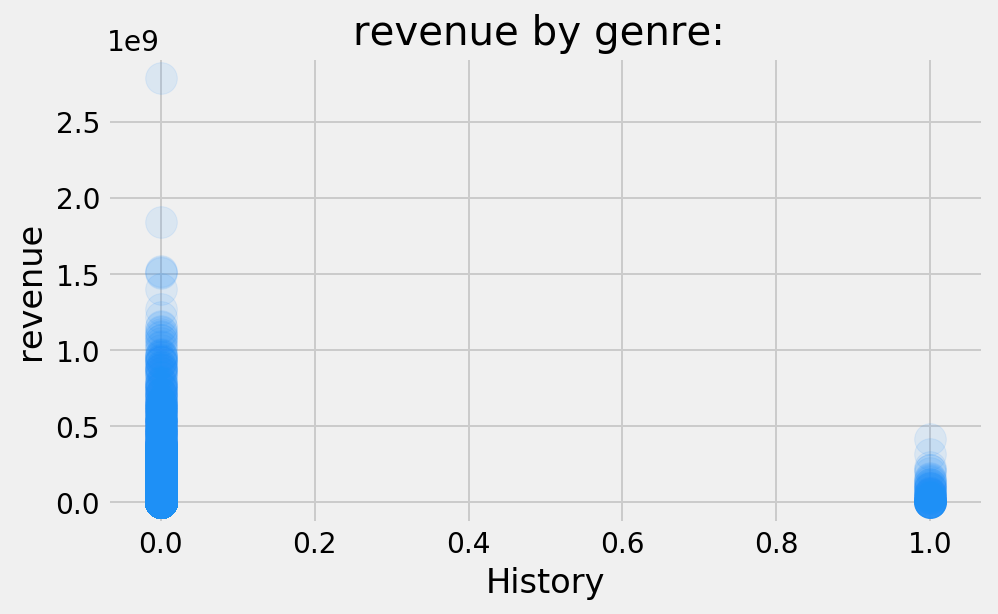

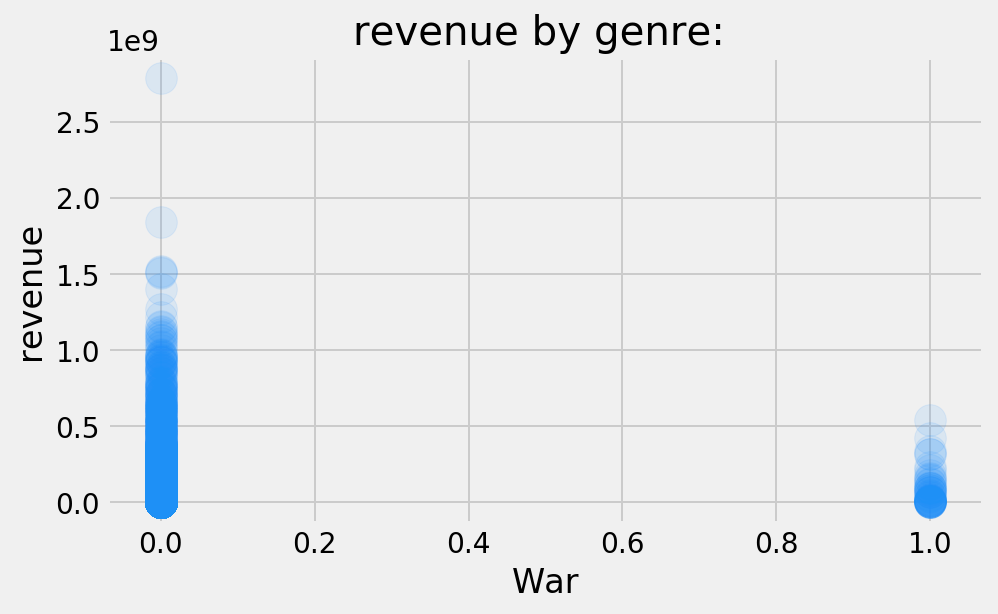

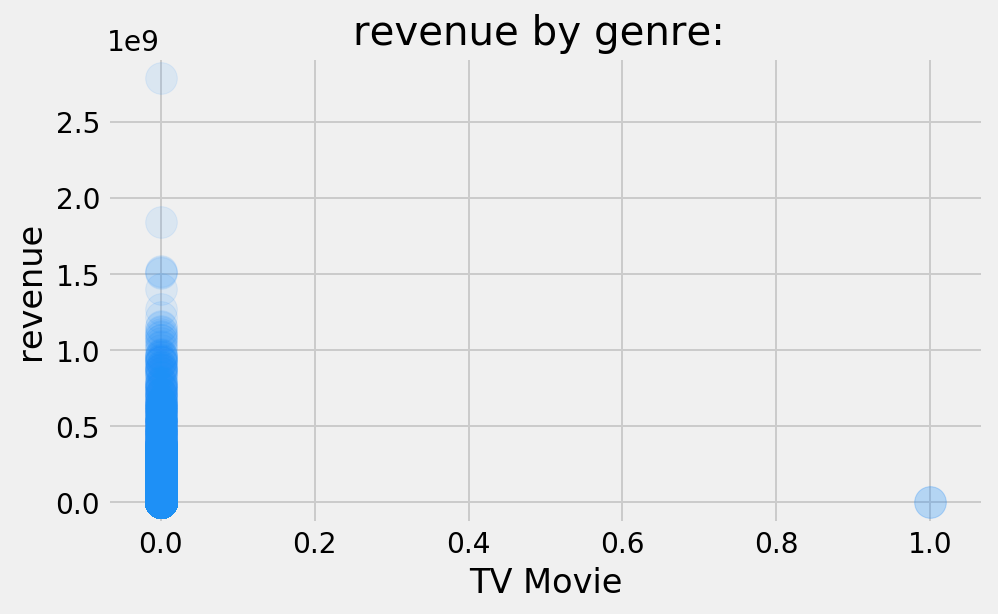

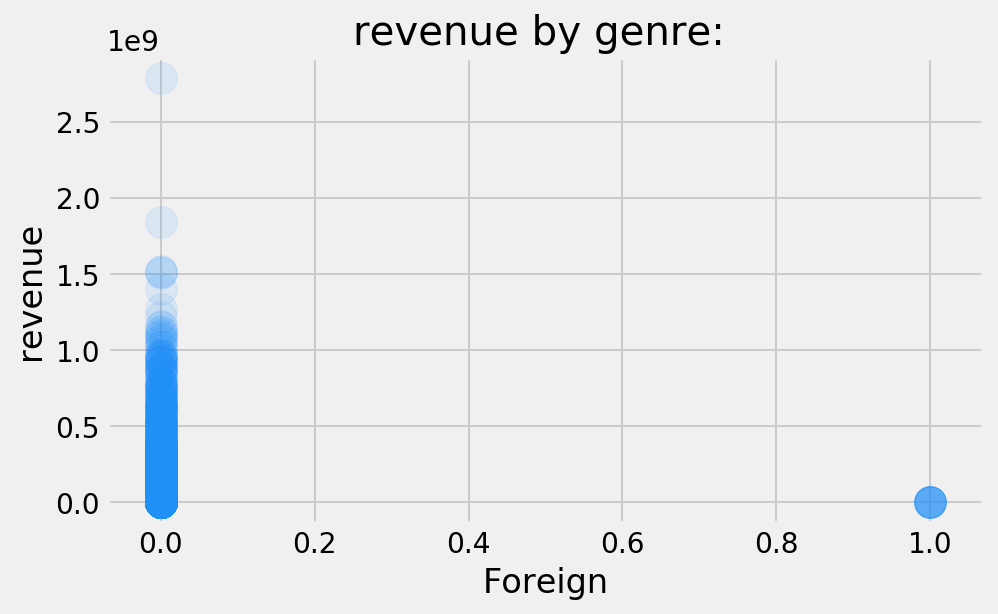

In [262]:
for genre in genre_list:
    movies_1990_two.plot(x = genre, y='revenue', kind='scatter', color='dodgerblue', figsize=(7,4), s=250, alpha = .1, title = ('revenue by genre: '.format(genre)));

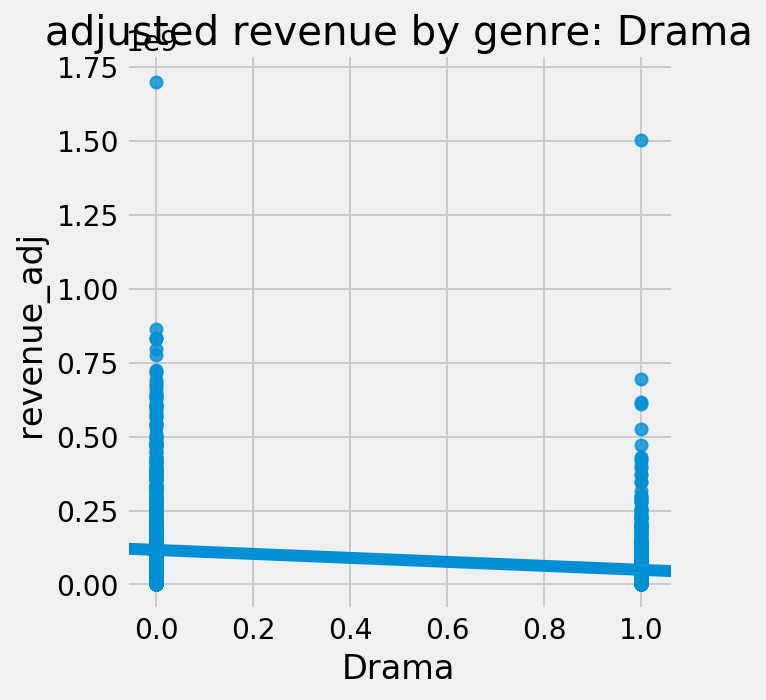

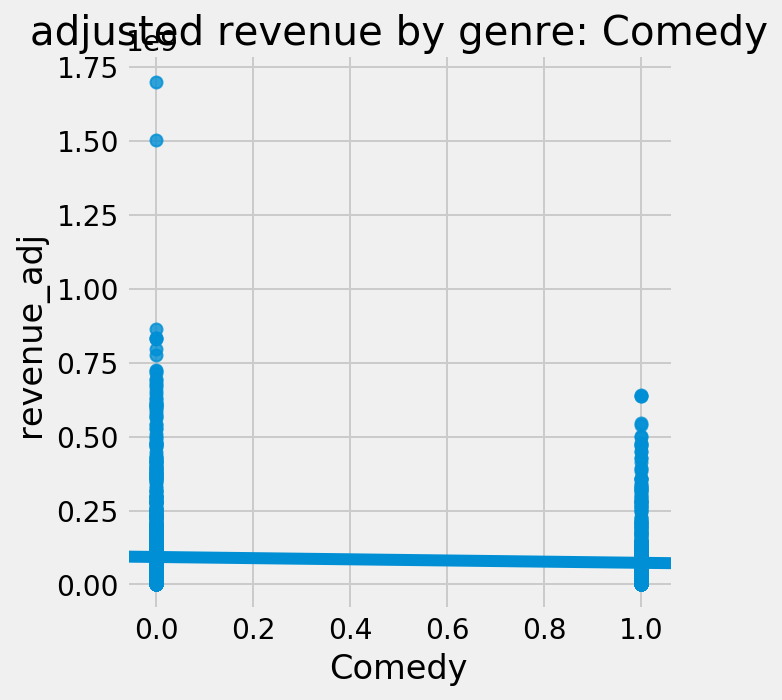

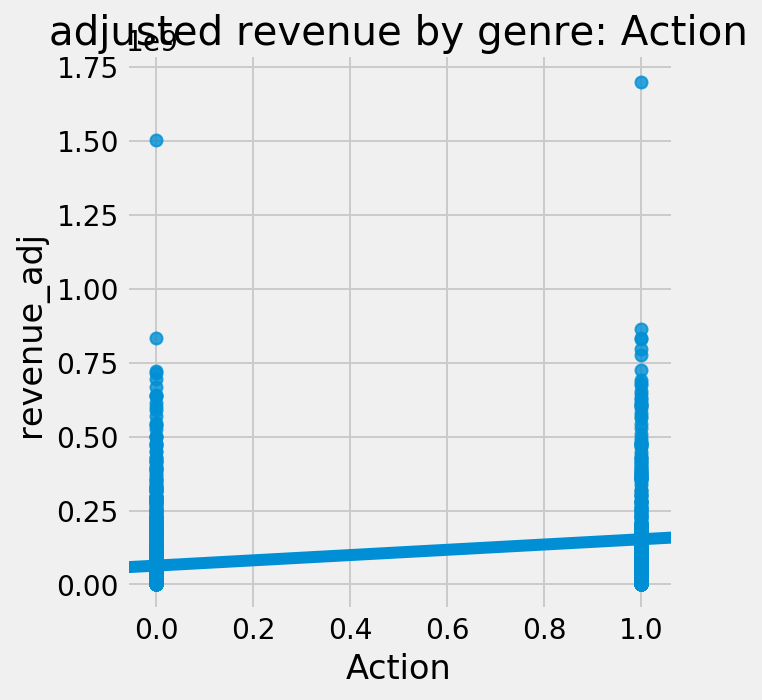

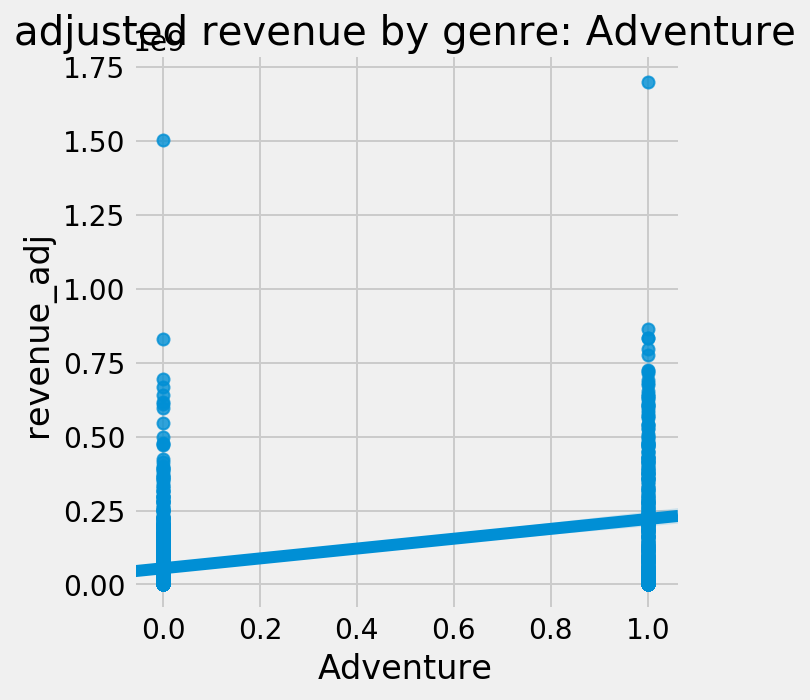

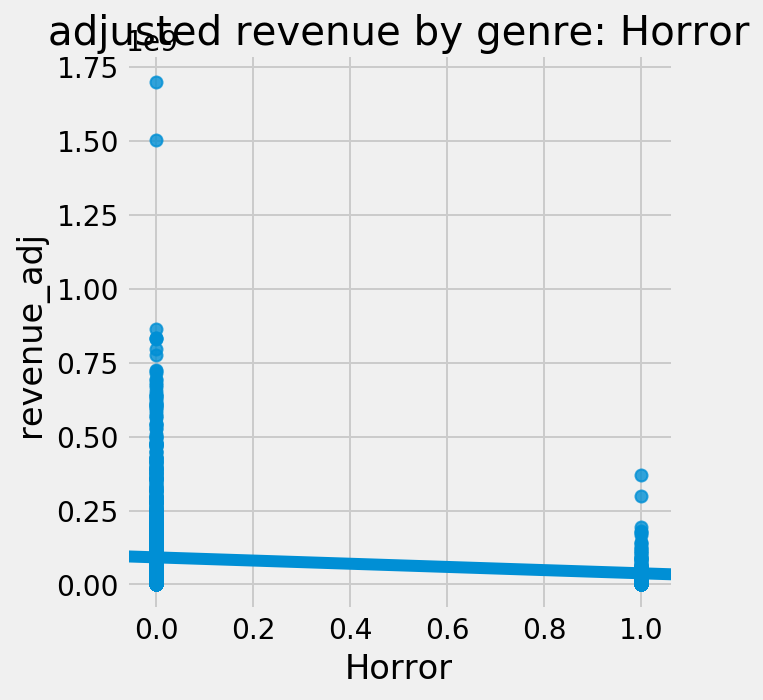

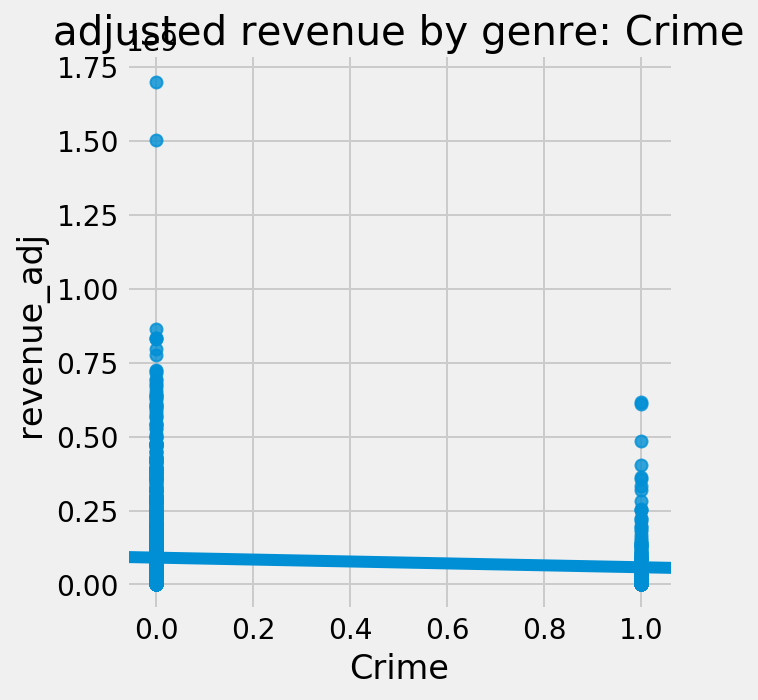

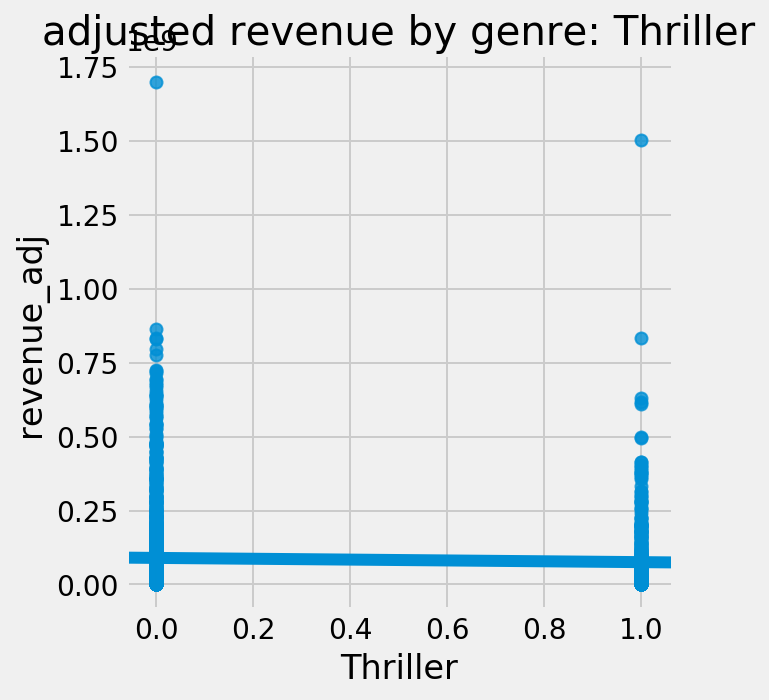

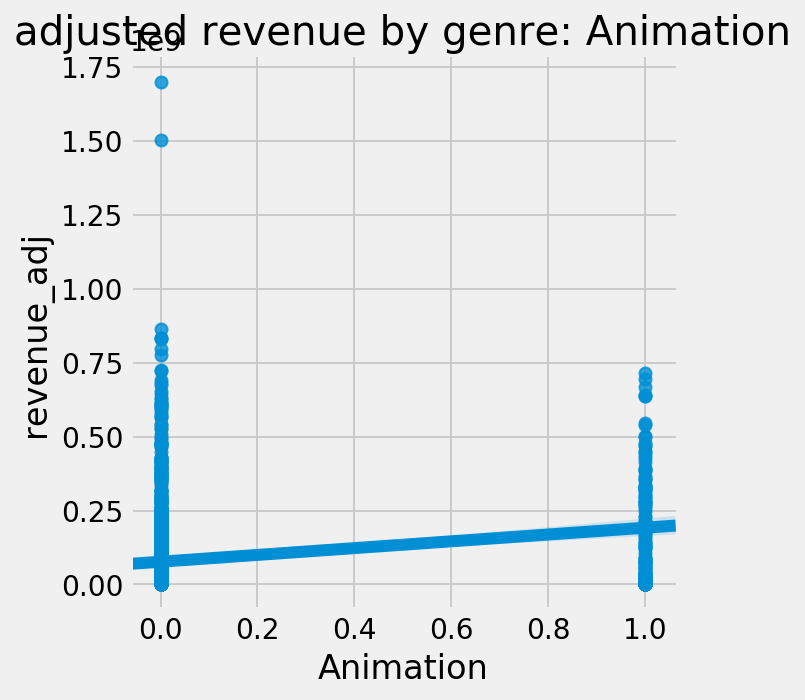

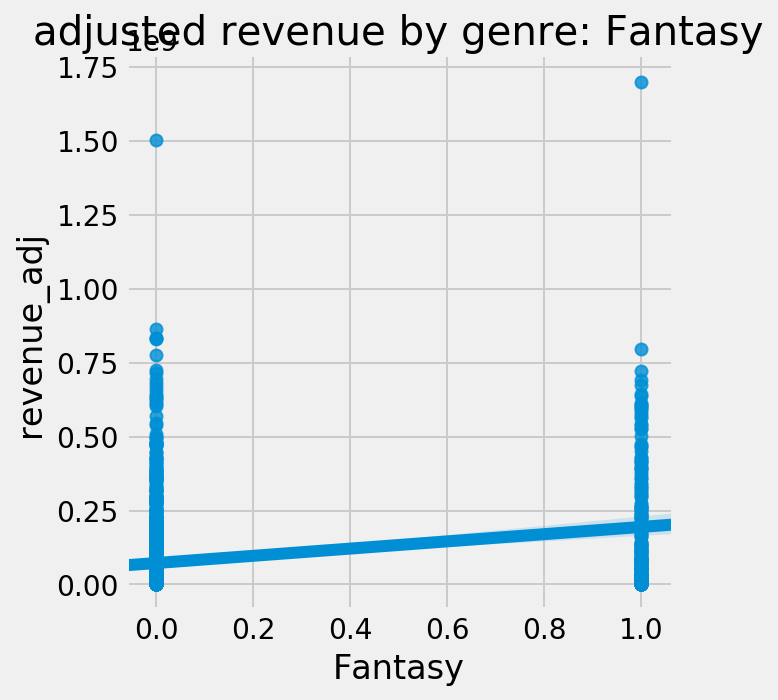

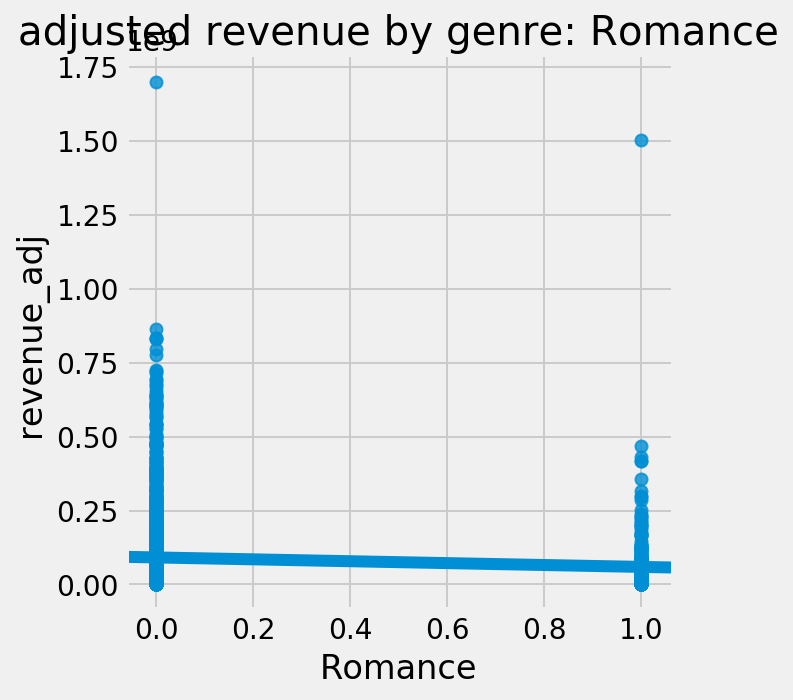

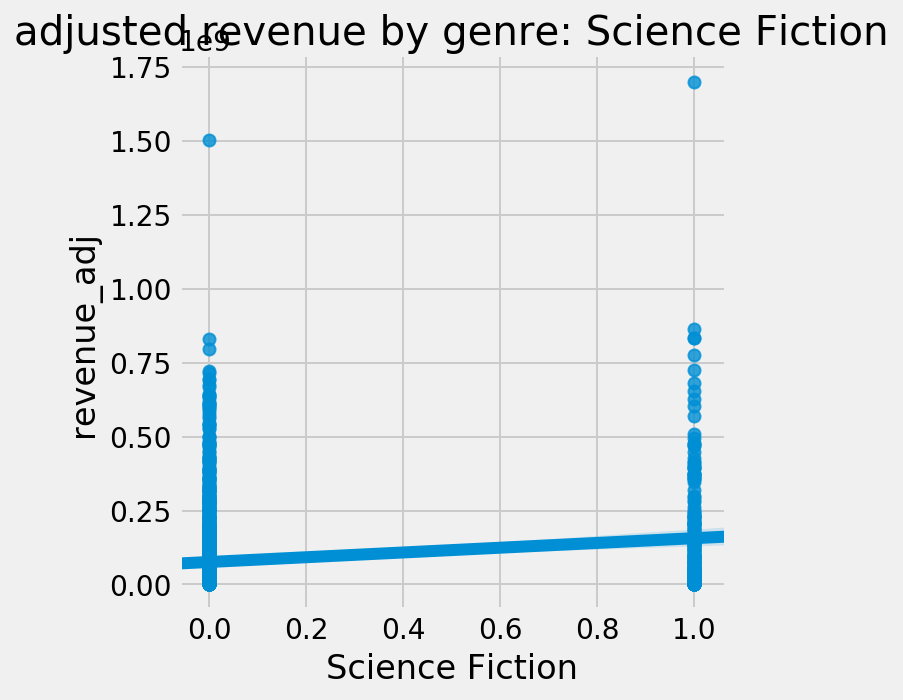

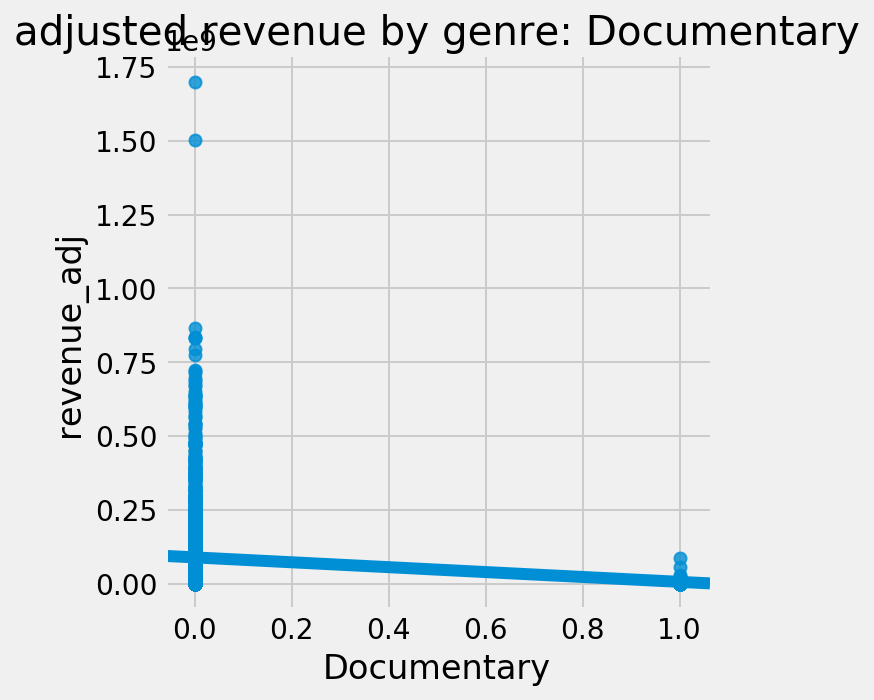

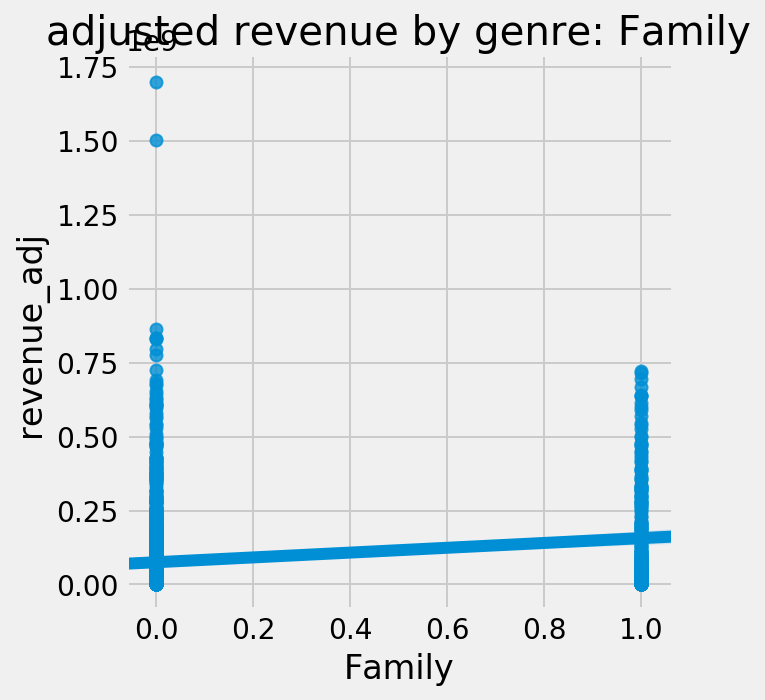

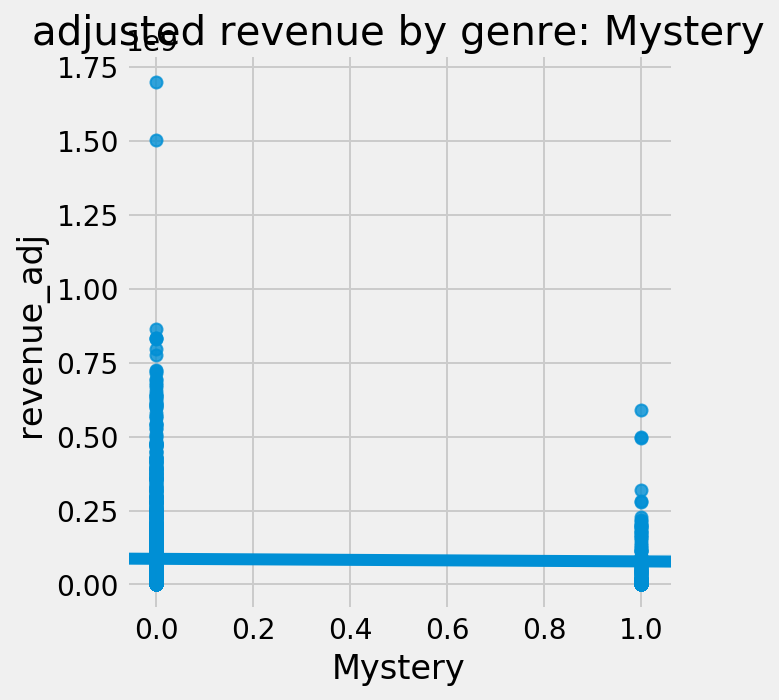

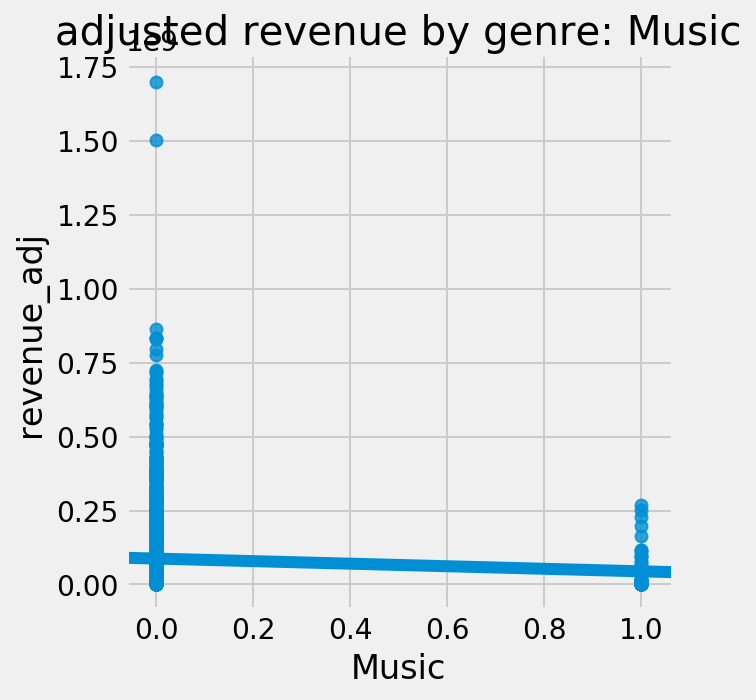

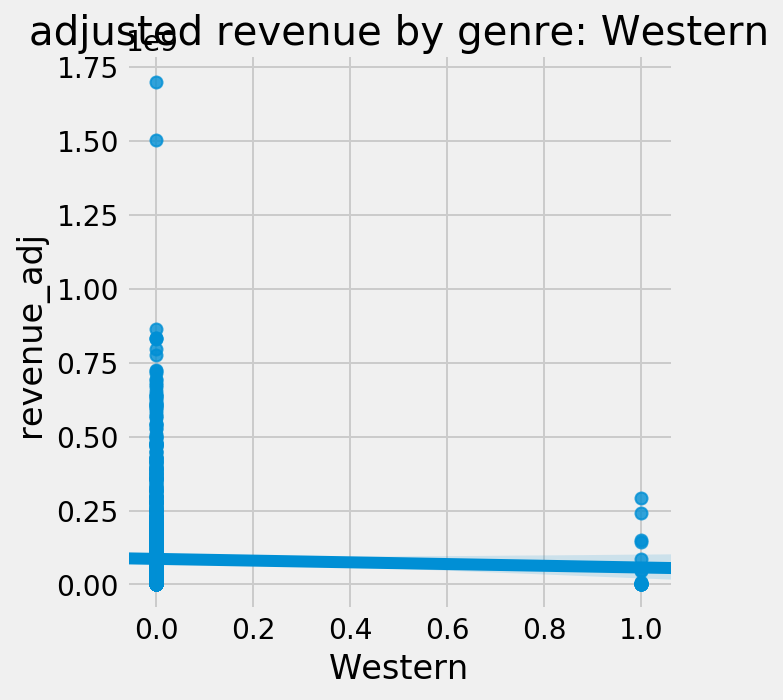

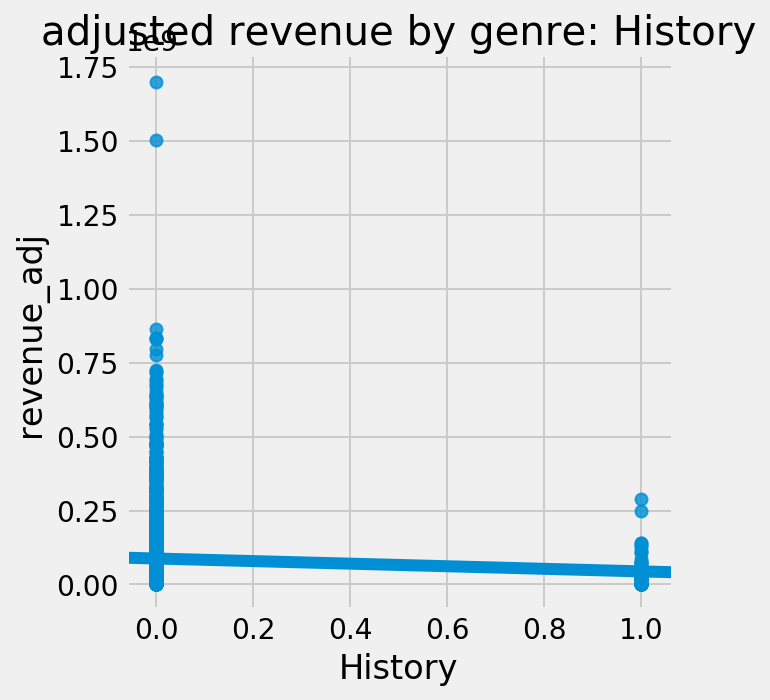

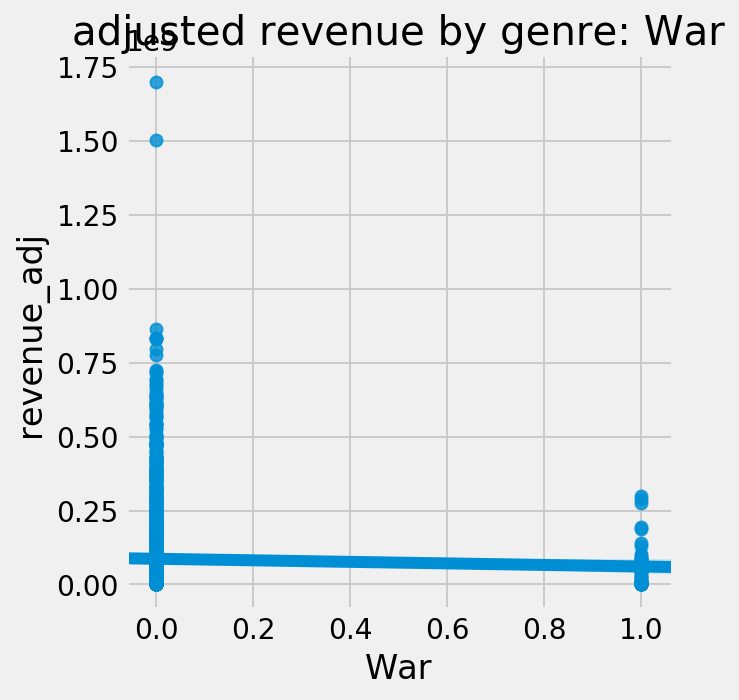

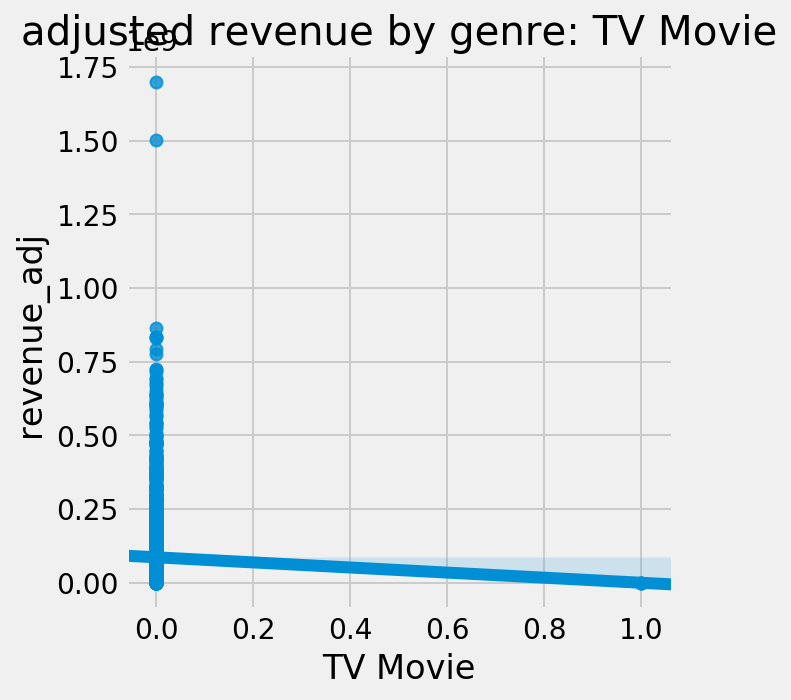

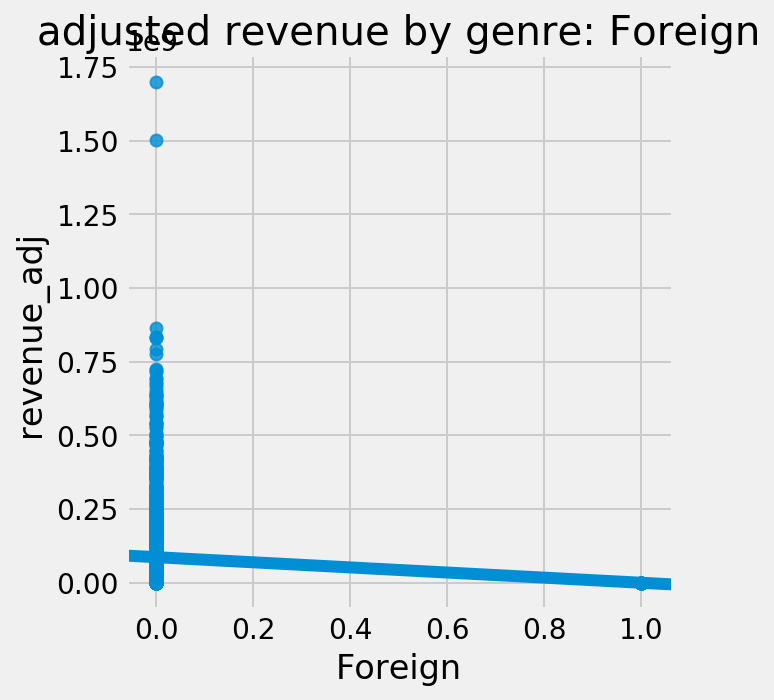

In [263]:
for genre in genre_list:
    sns.lmplot(x = genre, y='revenue_adj',data=movies_1990_two,fit_reg=True)
    ax = plt.gca()
    ax.set_title('adjusted revenue by genre: {}'.format(genre))

The above results definitely indicate that the features we're interested generally do have some correlation (some negative, some positive) with box office succes. Thus, in the following section we'll create a linear regression to attempt to solve the original question asked of us:

In [264]:
movies_1990_two.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'overview',
       'production_companies', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'tagline', 'title', 'vote_average', 'vote_count',
       'year_x', 'Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime',
       'Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction',
       'Documentary', 'Family', 'Mystery', 'Music', 'Western', 'History',
       'War', 'TV Movie', 'Foreign', 'year_int', 'year_y', 'buying_power',
       'revenue_adj', 'budget_adj'],
      dtype='object')

In [265]:
feature_cols = ['Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime','Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction','Documentary', 'Family', 'Mystery', 'Music', 'Western', 'History','War', 'TV Movie', 'Foreign','budget_adj']

In [268]:
from sklearn.linear_model import LinearRegression

# Create X and y.
X = movies_1990_two[feature_cols]
y = movies_1990_two.revenue_adj

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print("intercept: ", linreg.intercept_)
print(linreg.coef_)

list(zip(feature_cols, linreg.coef_))

intercept:  8071901.818433702
[-6.10095299e+06 -8.06223003e+06 -1.29310468e+07  2.27223679e+07
  1.08268649e+06 -8.27978070e+06 -6.19319483e+06  1.99056327e+07
 -6.62322655e+05  6.26796947e+06 -7.56511603e+06 -3.54667693e+06
 -1.07833909e+07 -5.18469041e+06 -1.08280961e+07 -5.63497637e+07
 -2.41177638e+07 -4.33661348e+06  2.50002684e+06 -1.50522362e+06
  3.31045338e+00]


[('Drama', -6100952.986385688),
 ('Comedy', -8062230.0298983585),
 ('Action', -12931046.777585957),
 ('Adventure', 22722367.88830381),
 ('Horror', 1082686.4925292425),
 ('Crime', -8279780.7037530085),
 ('Thriller', -6193194.828464579),
 ('Animation', 19905632.670157403),
 ('Fantasy', -662322.6552669386),
 ('Romance', 6267969.471468849),
 ('Science Fiction', -7565116.034591134),
 ('Documentary', -3546676.9282073327),
 ('Family', -10783390.909345029),
 ('Mystery', -5184690.412101013),
 ('Music', -10828096.0918888),
 ('Western', -56349763.73157691),
 ('History', -24117763.827818606),
 ('War', -4336613.4772460675),
 ('TV Movie', 2500026.837877001),
 ('Foreign', -1505223.6150087458),
 ('budget_adj', 3.3104533794453443)]

Now we'll create two functions based on the model so we can easily predict both *revenue* and *profitability* of a given film:

In [269]:
def rev_predict (drama, comedy, action, adventure, horror, crime, thriller, animation, fantasy, romance, science_fiction, documentary, family, mystery, music, western, history, war, tv_movie, foreign, budget_adj):
    return(8071901.818 + (drama * (-6100952.99)) + (comedy * (-8062230.03)) + (action * (-12931046.78)) + (adventure * (22722367.89)) + (horror * (1082686.49)) + (crime * (-8279780.70)) + (thriller * (-6193194.83)) + (animation * (19905632.67)) + (fantasy * (-662322.66)) + (romance * (6267969.47)) + (science_fiction * (-7565116.035)) + (documentary * (-3546676.93)) + (family * (-10783390.91)) + (mystery * (-5184690.41)) + (music * (-10828096.09)) + (western * (-56349763.73)) + (history * (-24117763.83)) + (war * (-4336613.48)) + (tv_movie * (2500026.84)) + (foreign * (-1505223.62)) + (budget_adj * 3.31))

In [270]:
def profit_predict (drama, comedy, action, adventure, horror, crime, thriller, animation, fantasy, romance, science_fiction, documentary, family, mystery, music, western, history, war, tv_movie, foreign, budget_adj):
    return(8071901.818 + (drama * (-6100952.99)) + (comedy * (-8062230.03)) + (action * (-12931046.78)) + (adventure * (22722367.89)) + (horror * (1082686.49)) + (crime * (-8279780.70)) + (thriller * (-6193194.83)) + (animation * (19905632.67)) + (fantasy * (-662322.66)) + (romance * (6267969.47)) + (science_fiction * (-7565116.035)) + (documentary * (-3546676.93)) + (family * (-10783390.91)) + (mystery * (-5184690.41)) + (music * (-10828096.09)) + (western * (-56349763.73)) + (history * (-24117763.83)) + (war * (-4336613.48)) + (tv_movie * (2500026.84)) + (foreign * (-1505223.62)) + (budget_adj * 3.31) - budget_adj)

In [271]:
rev_predict(0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,150000000)

519292844.078

In [272]:
profit_predict(0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,150000000)

369292844.078

Next, we'll take a look at the RMSE to see if there's a better subset of fields we could be using for this model. Ultimately we find that there isn't:

In [273]:
from sklearn.model_selection import train_test_split

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, feature_cols):
    X = movies_1990_two[feature_cols]
    y = movies_1990_two.revenue_adj
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [274]:
# Compare different sets of features.
print(train_test_rmse(movies_1990_two, ['Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime','Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction','Documentary', 'Family', 'budget_adj']))
print(train_test_rmse(movies_1990_two, ['Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime','Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction','Documentary', 'budget_adj']))
print(train_test_rmse(movies_1990_two, ['Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime','Thriller', 'Fantasy', 'Romance', 'Science Fiction','Documentary', 'Family', 'budget_adj']))
print(train_test_rmse(movies_1990_two, ['Drama', 'Comedy', 'Action', 'budget_adj']))
print(train_test_rmse(movies_1990_two, ['budget_adj']))

105952644.73996103
105981148.71559009
105972762.6298445
106117127.98985791
105964517.21990913


Finally, we'll check for any multicoliniarity just to be safe. We ultimately find very little, with the exception being the relationship between the FAMILY and ANIMATED genres:

In [275]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# Fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

array([78687693.38761434, 78687693.38761434, 78687693.38761434,
       78687693.38761434, 78687693.38761434, 78687693.38761434,
       78687693.38761434, 78687693.38761434, 78687693.38761434,
       78687693.38761434, 78687693.38761434, 78687693.38761434,
       78687693.38761434, 78687693.38761434, 78687693.38761434,
       78687693.38761434, 78687693.38761434, 78687693.38761434,
       78687693.38761434, 78687693.38761434, 78687693.38761434,
       78687693.38761434, 78687693.38761434, 78687693.38761434,
       78687693.38761434, 78687693.38761434, 78687693.38761434,
       78687693.38761434, 78687693.38761434, 78687693.38761434,
       78687693.38761434, 78687693.38761434, 78687693.38761434,
       78687693.38761434, 78687693.38761434, 78687693.38761434,
       78687693.38761434, 78687693.38761434, 78687693.38761434,
       78687693.38761434, 78687693.38761434, 78687693.38761434,
       78687693.38761434, 78687693.38761434, 78687693.38761434,
       78687693.38761434, 78687693.38761

                    Drama    Comedy    Action  Adventure    Horror     Crime  \
Drama            1.000000 -0.202736 -0.237151  -0.278828 -0.181709  0.087301   
Comedy          -0.202736  1.000000 -0.177994  -0.071819 -0.137380 -0.119489   
Action          -0.237151 -0.177994  1.000000   0.335654 -0.069324  0.136899   
Adventure       -0.278828 -0.071819  0.335654   1.000000 -0.141399 -0.145594   
Horror          -0.181709 -0.137380 -0.069324  -0.141399  1.000000 -0.060286   
Crime            0.087301 -0.119489  0.136899  -0.145594 -0.060286  1.000000   
Thriller        -0.028652 -0.337061  0.263654  -0.067302  0.238662  0.278831   
Animation       -0.230515  0.155881 -0.104843   0.261338 -0.099495 -0.119630   
Fantasy         -0.186022 -0.018814  0.139718   0.300095  0.001612 -0.115893   
Romance          0.219516  0.195099 -0.217965  -0.145875 -0.131989 -0.116844   
Science Fiction -0.185884 -0.148324  0.281204   0.241651  0.023749 -0.121872   
Documentary     -0.140829 -0.097426 -0.1

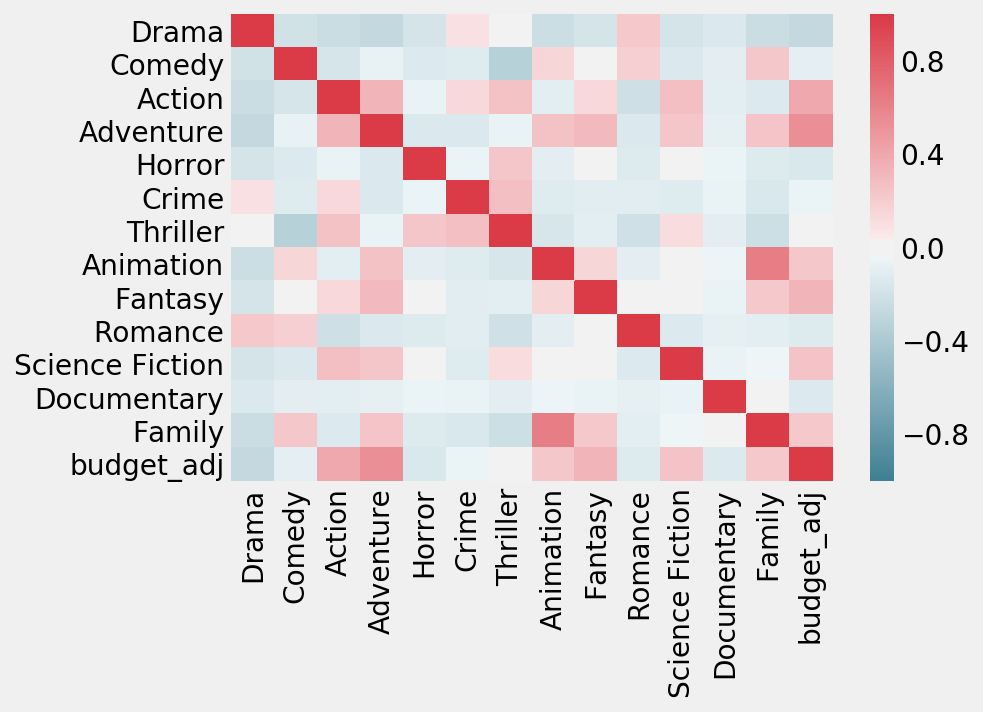

In [276]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = movies_1990_two[['Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime','Thriller', 'Animation', 'Fantasy', 'Romance', 'Science Fiction','Documentary', 'Family', 'budget_adj']].corr()
print(correlations)
sns.heatmap(correlations, cmap=cmap, vmin=-1, vmax=1);

In the next notebook, we'll attempt to predict genre based on plot summary.